<a href="https://colab.research.google.com/github/envirodatascience/final-project-env617_personalcareproducts/blob/main/Final_Project_Masterfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Install Packages

In [1]:
# force to upgrade plotnine .8
!pip install plotnine --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [195]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import pandas, numpy, and plotnine
from plotnine import *
import plotnine
from plotnine.data import mpg
import pandas as pd
import numpy as np
from mizani.formatters import scientific_format, percent_format, currency_format

In [196]:
from fuzzywuzzy import fuzz 

/usr/local/lib/python3.9/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning


# Part 2: Read Financial Data

In [3]:
# read data from a github link
url = 'https://raw.githubusercontent.com/envirodatascience/final-project-env617_personalcareproducts/main/financial-data'
df = pd.read_csv(url)
df.head()

,Region,Market,Chart,Name,Unit,Source,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,Worldwide,Skin Care,Average Revenue per Capita,Baby & Child,USD (US$),Statista,0.54,0.51,0.50,0.52,0.53,0.54,0.52,0.55,0.56,0.60,0.62,0.65,0.67,0.70
1,Worldwide,Skin Care,Revenue,Baby & Child,billion USD (US$),Statista,3.81,3.60,3.62,3.79,3.93,4.03,3.90,4.14,4.29,4.65,4.84,5.05,5.27,5.53
2,Worldwide,Skin Care,Revenue Change,Baby & Child,percent,Statista,0.00,-5.59,0.56,4.53,3.88,2.52,-3.20,5.97,3.72,8.39,4.15,4.25,4.44,4.84
3,Worldwide,Skin Care,Average Revenue per Capita,Body,USD (US$),Statista,3.96,3.64,3.60,3.71,3.77,3.79,3.50,3.63,3.79,4.06,4.15,4.25,4.37,4.51
4,Worldwide,Skin Care,Revenue,Body,billion USD (US$),Statista,27.90,25.94,25.97,27.06,27.80,28.16,26.25,27.49,28.92,31.26,32.17,33.23,34.44,35.86


In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  189 non-null    object 
 1   Market  189 non-null    object 
 2   Chart   189 non-null    object 
 3   Name    189 non-null    object 
 4   Unit    189 non-null    object 
 5   Source  189 non-null    object 
 6   2014    189 non-null    float64
 7   2015    189 non-null    float64
 8   2016    189 non-null    float64
 9   2017    189 non-null    float64
 10  2018    189 non-null    float64
 11  2019    189 non-null    float64
 12  2020    189 non-null    float64
 13  2021    189 non-null    float64
 14  2022    189 non-null    float64
 15  2023    189 non-null    float64
 16  2024    189 non-null    float64
 17  2025    189 non-null    float64
 18  2026    189 non-null    float64
 19  2027    189 non-null    float64
dtypes: float64(14), object(6)
memory usage: 29.7+ KB


In [5]:
# check for duplicates
# result shows no duplicates in the data
df[df.duplicated(keep=False) == True]

,Region,Market,Chart,Name,Unit,Source,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027


In [6]:
# check for distribution
df['Region'].value_counts()

Worldwide    189
Name: Region, dtype: int64

In [7]:
# check for distribution
df['Market'].value_counts()

Cosmetics                 24
Personal Care             22
Skin Care                 21
Beauty & Personal Care    19
Face                      10
Fragrances                 9
Deodorants                 7
Eyes                       7
Body                       7
Baby & Child               7
Hair Care                  7
Lips                       7
Nails                      7
Natural Cosmetics          7
Oral Care                  7
Shaving                    7
Shower & Bath              7
Sun Protection             7
Name: Market, dtype: int64

In [8]:
# check for distribution
df['Chart'].value_counts()

Average Revenue per Capita    37
Mobile Desktop Split          36
Online Revenue Share          36
Revenue                       32
Revenue Change                32
Luxury Revenue Share           6
Revenue by Segment             5
Revenue Change by Segment      5
Name: Chart, dtype: int64

In [9]:
# check for distribution
df['Name'].value_counts()

Total                57
Desktop              18
Online               18
Mobile               18
Offline              18
Face                  6
Non-Luxury            3
Sun Protection        3
Skin Care             3
Shower & Bath         3
Shaving               3
Personal Care         3
Oral Care             3
Baby & Child          3
Natural Cosmetics     3
Body                  3
Luxury                3
Lips                  3
Hair Care             3
Fragrances            3
Eyes                  3
Deodorants            3
Cosmetics             3
Nails                 3
Name: Name, dtype: int64

In [10]:
# check for distribution
df['Unit'].value_counts()

percent               115
billion USD (US$)      37
USD (US$)              32
thousand USD (US$)      5
Name: Unit, dtype: int64

In [11]:
# check for distribution
df['Source'].value_counts()

Statista    189
Name: Source, dtype: int64

## Melt

In [12]:
# melt the data so that there's only one column for year
df_melt = pd.melt(df,id_vars=['Region','Market','Chart','Name','Unit','Source'],var_name='Year', value_name='Value')
df_melt.head()

,Region,Market,Chart,Name,Unit,Source,Year,Value
0,Worldwide,Skin Care,Average Revenue per Capita,Baby & Child,USD (US$),Statista,2014,0.54
1,Worldwide,Skin Care,Revenue,Baby & Child,billion USD (US$),Statista,2014,3.81
2,Worldwide,Skin Care,Revenue Change,Baby & Child,percent,Statista,2014,0.00
3,Worldwide,Skin Care,Average Revenue per Capita,Body,USD (US$),Statista,2014,3.96
4,Worldwide,Skin Care,Revenue,Body,billion USD (US$),Statista,2014,27.90


In [13]:
# check data info
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  2646 non-null   object 
 1   Market  2646 non-null   object 
 2   Chart   2646 non-null   object 
 3   Name    2646 non-null   object 
 4   Unit    2646 non-null   object 
 5   Source  2646 non-null   object 
 6   Year    2646 non-null   object 
 7   Value   2646 non-null   float64
dtypes: float64(1), object(7)
memory usage: 165.5+ KB


# Part 3: Analyze Financial Data

## By Market (Cosmetics, Fragrances, Personal Care, Skin Care)

In [14]:
# filter total revenue for four market categories: cosmetics, fragrances, personal care, skin care
df_revenue_cosmetics = df_melt[(df_melt.Market == 'Cosmetics') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Total')]
df_revenue_fragrances = df_melt[(df_melt.Market == 'Fragrances') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Total')]
df_revenue_personalcare = df_melt[(df_melt.Market == 'Personal Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Total')]
df_revenue_skincare = df_melt[(df_melt.Market == 'Skin Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Total')]

# combine filtered data
df_revenue = pd.concat([df_revenue_cosmetics,df_revenue_fragrances,df_revenue_personalcare,df_revenue_skincare]).reset_index()

# preview data
df_revenue.head()

,index,Region,Market,Chart,Name,Unit,Source,Year,Value
0,153,Worldwide,Cosmetics,Revenue,Total,billion USD (US$),Statista,2014,82.25
1,342,Worldwide,Cosmetics,Revenue,Total,billion USD (US$),Statista,2015,77.85
2,531,Worldwide,Cosmetics,Revenue,Total,billion USD (US$),Statista,2016,79.59
3,720,Worldwide,Cosmetics,Revenue,Total,billion USD (US$),Statista,2017,83.77
4,909,Worldwide,Cosmetics,Revenue,Total,billion USD (US$),Statista,2018,87.58


In [15]:
# check data info
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   56 non-null     int64  
 1   Region  56 non-null     object 
 2   Market  56 non-null     object 
 3   Chart   56 non-null     object 
 4   Name    56 non-null     object 
 5   Unit    56 non-null     object 
 6   Source  56 non-null     object 
 7   Year    56 non-null     object 
 8   Value   56 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ KB


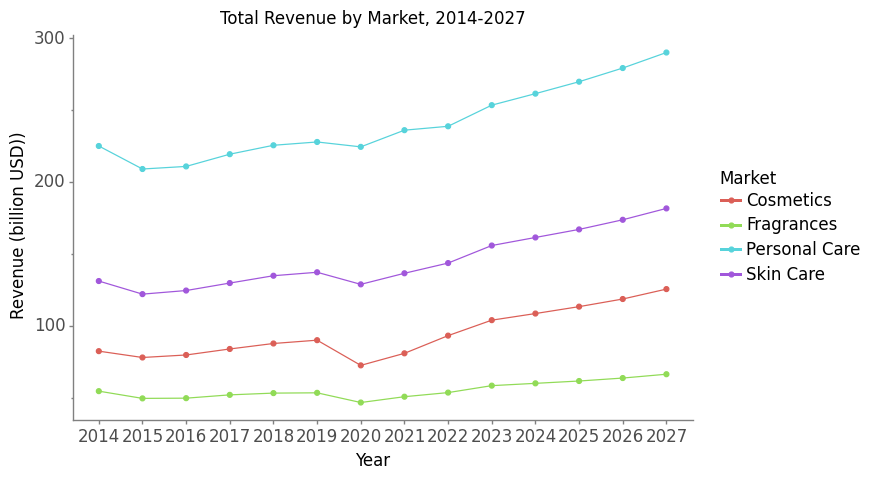

<ggplot: (8735107633387)>

In [16]:
# plot the total revenue by market to see how the revenue changes over time
plotnine.options.figure_size = (8, 5)
(
  ggplot(df_revenue) # dataframe with filtering
    + aes('Year', 'Value', color='Market', group='Market')
    + geom_point()
    + geom_line()
    #+ geom_line(aes(x='variable', y='value'), color='black') # sets aes() in geom_line rather than ggplot(). Sets color manually with hex code
    #+ scale_y_continuous(limits=[0, 250]) # sets limits of y axis
    + xlab("Year") # adds x axis label
    + ylab("Revenue (billion USD))") # adds y axis label
    + ggtitle("Total Revenue by Market, 2014-2027") # adds title
    + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
    + theme(axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line gray 
            axis_ticks=element_line(color = "gray"), # further adjusts theme_classic() - axis ticks gray
            text=element_text(size = 12)) # sets font size for whole chart
)

## By Cosmetics

In [17]:
# filter total revenue for sub-market categories under cosmetics: eyes, face, lips, nails, natural cosmetics
df_revenue_cosmetics_eyes = df_melt[(df_melt.Market == 'Cosmetics') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Eyes')]
df_revenue_cosmetics_face = df_melt[(df_melt.Market == 'Cosmetics') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Face')]
df_revenue_cosmetics_lips = df_melt[(df_melt.Market == 'Cosmetics') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Lips')]
df_revenue_cosmetics_nails = df_melt[(df_melt.Market == 'Cosmetics') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Nails')]
df_revenue_cosmetics_naturalcos = df_melt[(df_melt.Market == 'Cosmetics') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Natural Cosmetics')]

# combine filtered data
df_revenue_cosmetics_all = pd.concat([df_revenue_cosmetics_eyes,df_revenue_cosmetics_face,df_revenue_cosmetics_lips,df_revenue_cosmetics_nails,df_revenue_cosmetics_naturalcos]).reset_index()

# preview data
df_revenue_cosmetics_all

,index,Region,Market,Chart,Name,Unit,Source,Year,Value
0,31,Worldwide,Cosmetics,Revenue,Eyes,billion USD (US$),Statista,2014,22.19
1,220,Worldwide,Cosmetics,Revenue,Eyes,billion USD (US$),Statista,2015,20.92
2,409,Worldwide,Cosmetics,Revenue,Eyes,billion USD (US$),Statista,2016,21.20
3,598,Worldwide,Cosmetics,Revenue,Eyes,billion USD (US$),Statista,2017,22.17
4,787,Worldwide,Cosmetics,Revenue,Eyes,billion USD (US$),Statista,2018,23.06
...,...,...,...,...,...,...,...,...,...
65,1774,Worldwide,Cosmetics,Revenue,Natural Cosmetics,billion USD (US$),Statista,2023,12.93
66,1963,Worldwide,Cosmetics,Revenue,Natural Cosmetics,billion USD (US$),Statista,2024,13.87
67,2152,Worldwide,Cosmetics,Revenue,Natural Cosmetics,billion USD (US$),Statista,2025,14.87
68,2341,Worldwide,Cosmetics,Revenue,Natural Cosmetics,billion USD (US$),Statista,2026,16.00


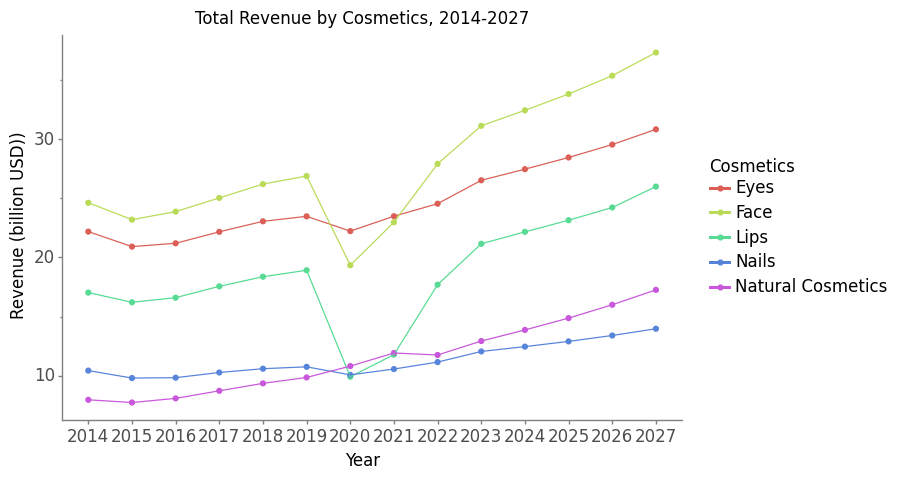

<ggplot: (8735104885113)>

In [18]:
# plot the total revenue by cosmetics to see how the revenue changes over time
plotnine.options.figure_size = (8, 5)
(
  ggplot(df_revenue_cosmetics_all) # dataframe with filtering
    + aes('Year', 'Value', color='Name', group='Name')
    + geom_point()
    + geom_line()
    #+ geom_line(aes(x='variable', y='value'), color='black') # sets aes() in geom_line rather than ggplot(). Sets color manually with hex code
    #+ scale_y_continuous(limits=[0, 250]) # sets limits of y axis
    + guides(color=guide_legend(title="Cosmetics")) # add legend title
    + xlab("Year") # adds x axis label
    + ylab("Revenue (billion USD))") # adds y axis label
    + ggtitle("Total Revenue by Cosmetics, 2014-2027") # adds title
    + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
    + theme(axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line gray 
            axis_ticks=element_line(color = "gray"), # further adjusts theme_classic() - axis ticks gray
            text=element_text(size = 12)) # sets font size for whole chart
)

## By Personal Care

In [19]:
# filter total revenue for sub-market categories under personal care: deodorants, hair care, oral, shaving, shower & bath
df_revenue_personalcare_deodorants = df_melt[(df_melt.Market == 'Personal Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Deodorants')]
df_revenue_personalcare_hair = df_melt[(df_melt.Market == 'Personal Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Hair Care')]
df_revenue_personalcare_oral = df_melt[(df_melt.Market == 'Personal Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Oral')]
df_revenue_personalcare_shaving = df_melt[(df_melt.Market == 'Personal Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Shaving')]
df_revenue_personalcare_shower = df_melt[(df_melt.Market == 'Personal Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Shower & Bath')]

# combine filtered data
df_revenue_personalcare_all = pd.concat([df_revenue_personalcare_deodorants,df_revenue_personalcare_hair,df_revenue_personalcare_oral,df_revenue_personalcare_shaving,df_revenue_personalcare_shower]).reset_index()

# preview data
df_revenue_personalcare_all.head()

,index,Region,Market,Chart,Name,Unit,Source,Year,Value
0,10,Worldwide,Personal Care,Revenue,Deodorants,billion USD (US$),Statista,2014,22.57
1,199,Worldwide,Personal Care,Revenue,Deodorants,billion USD (US$),Statista,2015,20.76
2,388,Worldwide,Personal Care,Revenue,Deodorants,billion USD (US$),Statista,2016,21.03
3,577,Worldwide,Personal Care,Revenue,Deodorants,billion USD (US$),Statista,2017,22.07
4,766,Worldwide,Personal Care,Revenue,Deodorants,billion USD (US$),Statista,2018,22.63


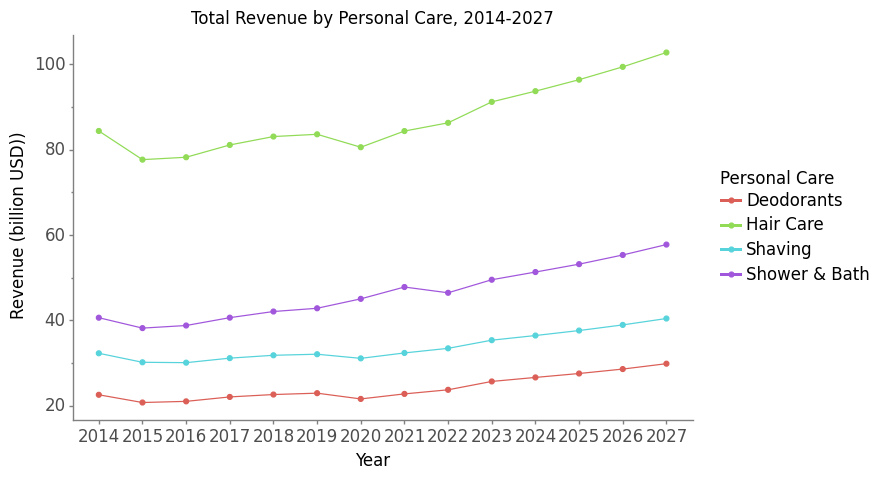

<ggplot: (8735103238726)>

In [20]:
# plot the total revenue by personal care to see how the revenue changes over time
plotnine.options.figure_size = (8, 5)
(
  ggplot(df_revenue_personalcare_all) # dataframe with filtering
    + aes('Year', 'Value', color='Name', group='Name')
    + geom_point()
    + geom_line()
    #+ geom_line(aes(x='variable', y='value'), color='black') # sets aes() in geom_line rather than ggplot(). Sets color manually with hex code
    #+ scale_y_continuous(limits=[0, 250]) # sets limits of y axis
    + guides(color=guide_legend(title="Personal Care")) # add legend title
    + xlab("Year") # adds x axis label
    + ylab("Revenue (billion USD))") # adds y axis label
    + ggtitle("Total Revenue by Personal Care, 2014-2027") # adds title
    + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
    + theme(axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line gray 
            axis_ticks=element_line(color = "gray"), # further adjusts theme_classic() - axis ticks gray
            text=element_text(size = 12)) # sets font size for whole chart
)

## By Skin Care

In [21]:
# filter total revenue for sub-market categories under skin care: baby & child, body, face, sun protection
df_revenue_skincare_baby = df_melt[(df_melt.Market == 'Skin Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Baby & Child')]
df_revenue_skincare_body = df_melt[(df_melt.Market == 'Skin Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Body')]
df_revenue_skincare_face = df_melt[(df_melt.Market == 'Skin Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Face')]
df_revenue_skincare_sun = df_melt[(df_melt.Market == 'Skin Care') & (df_melt.Chart == 'Revenue') & (df_melt.Name == 'Sun Protection')]

# combine filtered data
df_revenue_skincare_all = pd.concat([df_revenue_skincare_baby,df_revenue_skincare_body,df_revenue_skincare_face,df_revenue_skincare_sun]).reset_index()

# preview data
df_revenue_skincare_all.head()

,index,Region,Market,Chart,Name,Unit,Source,Year,Value
0,1,Worldwide,Skin Care,Revenue,Baby & Child,billion USD (US$),Statista,2014,3.81
1,190,Worldwide,Skin Care,Revenue,Baby & Child,billion USD (US$),Statista,2015,3.60
2,379,Worldwide,Skin Care,Revenue,Baby & Child,billion USD (US$),Statista,2016,3.62
3,568,Worldwide,Skin Care,Revenue,Baby & Child,billion USD (US$),Statista,2017,3.79
4,757,Worldwide,Skin Care,Revenue,Baby & Child,billion USD (US$),Statista,2018,3.93


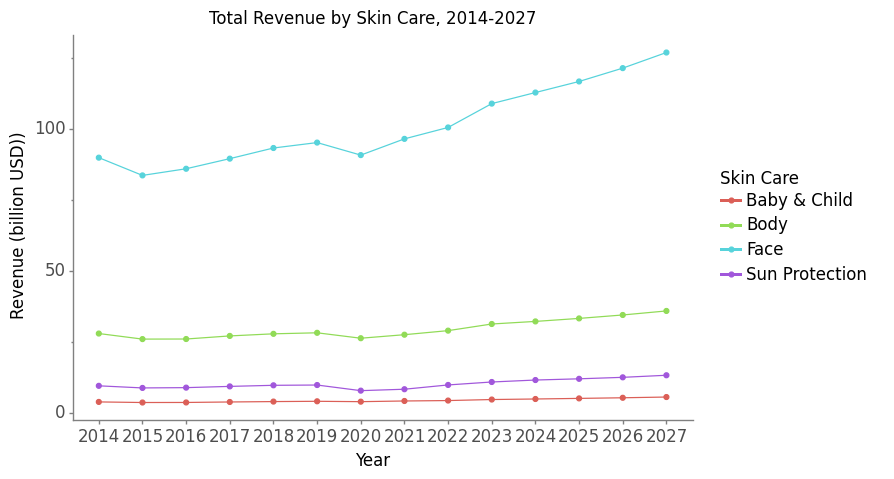

<ggplot: (8735103177162)>

In [22]:
# plot the total revenue by skin care to see how the revenue changes over time
plotnine.options.figure_size = (8, 5)
(
  ggplot(df_revenue_skincare_all) # dataframe with filtering
    + aes('Year', 'Value', color='Name', group='Name')
    + geom_point()
    + geom_line()
    #+ geom_line(aes(x='variable', y='value'), color='black') # sets aes() in geom_line rather than ggplot(). Sets color manually with hex code
    #+ scale_y_continuous(limits=[0, 250]) # sets limits of y axis
    + guides(color=guide_legend(title="Skin Care")) # add legend title
    + xlab("Year") # adds x axis label
    + ylab("Revenue (billion USD))") # adds y axis label
    + ggtitle("Total Revenue by Skin Care, 2014-2027") # adds title
    + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
    + theme(axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line gray 
            axis_ticks=element_line(color = "gray"), # further adjusts theme_classic() - axis ticks gray
            text=element_text(size = 12)) # sets font size for whole chart
)

# Part 4: Discuss Financial Data Results

# Part 5: Read Chemicals in Cosmetics Data

In [23]:
#import "Chemicals in cosmetics" data from the California Safe Cosmetics Program (CSCP) in the California Department of Public Health
url_2 = 'https://data.chhs.ca.gov/dataset/596b5eed-31de-4fd8-a645-249f3f9b19c4/resource/57da6c9a-41a7-44b0-ab8d-815ff2cd5913/download/cscpopendata.csv'
data = pd.read_csv(url_2)
df_chemicals_1 = pd.DataFrame(data)
df_chemicals_1

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [24]:
#gather information on data types 
df_chemicals_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80238 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114419 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [25]:
#Cast primary category column from object to string
df_chemicals_1['PrimaryCategory']=df_chemicals_1['PrimaryCategory'].astype(str)

In [26]:
#Create 'Segment' column to align PrimaryCategory with data that divides the beauty and personal care market into 4 segments
conditions = [
    (df_chemicals_1.PrimaryCategory == 'Makeup Products (non-permanent)') | (df_chemicals_1.PrimaryCategory == 'Nail Products'),
    (df_chemicals_1.PrimaryCategory == 'Baby Products') | (df_chemicals_1.PrimaryCategory == 'Skin Care Products') | (df_chemicals_1.PrimaryCategory == 'Sun-Related Products'),
    (df_chemicals_1.PrimaryCategory == 'Bath Products') | (df_chemicals_1.PrimaryCategory == 'Hair Care Products (non-coloring)') | (df_chemicals_1.PrimaryCategory == 'Hair Coloring Products') | (df_chemicals_1.PrimaryCategory == 'Oral Hygiene Products') | (df_chemicals_1.PrimaryCategory == 'Personal Care Products') | (df_chemicals_1.PrimaryCategory == 'Shaving Products'),
    (df_chemicals_1.PrimaryCategory == 'Fragrances')
    ]

values = ['Cosmetics', 'Skin Care', 'Personal Care', 'Fragrances']

df_chemicals_1['Segment'] = np.select(conditions, values)
df_chemicals_1

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Segment
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1,Cosmetics
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2,Personal Care
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2,Personal Care
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1,Cosmetics
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1,Cosmetics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics


In [27]:
#drop rows that have a '0' (i.e. unidentified) segment
#The rows with '0' in segment are those originally assigned to Tattoos and Permanent Makeup (not included in analysis)
df_chemicals_1.drop(df_chemicals_1.loc[df_chemicals_1['Segment']=='0'].index, inplace=True)
df_chemicals_1

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Segment
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1,Cosmetics
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2,Personal Care
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2,Personal Care
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1,Cosmetics
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1,Cosmetics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics


In [28]:
#Create new dataframe with just Cosmetics segment
df_chemicals_cosmetics = df_chemicals_1.loc[df_chemicals_1['Segment'] == 'Cosmetics']
df_chemicals_cosmetics

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Segment
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1,Cosmetics
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1,Cosmetics
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1,Cosmetics
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,9,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,NaN,1,Cosmetics
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1,Cosmetics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114629,41522,EYESHADOW / ATARDECER NARANJA,65000.0,Crema T1,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),48,...,68058,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1,Cosmetics


# Part 6: Analyze Chemicals in Cosmetics Data

##Overview

In [29]:
#What are the unique values in ProductName
df_chemicals_1['ProductName'].unique()

array(['ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES',
       "Glover's Medicated Shampoo",
       'PRECISION GLIMMER EYE LINER-ALL SHADES �', ...,
       'EYESHADOW  / ATARDECER NARANJA',
       'HYDRA-LIP TRANSLUCENT COLOR LIPSTICK',
       'OLD SPICE GENTLEMENS BLEND ALOE AND WILD SAGE BAR SOAP'],
      dtype=object)

In [30]:
#Number of unique values in ProductName
df_chemicals_1['ProductName'].nunique()

29367

In [31]:
#What are the unique values in CompanyName
df_chemicals_1['CompanyName'].unique()

array(['New Avon LLC', 'J. Strickland & Co.', 'OPI PRODUCTS INC.',
       'GOJO Industries, Inc.', 'CHANEL, INC',
       'Aloecare International, LLC', 'Entity Beauty, Inc.',
       'Revlon Consumer Product Corporation', 'Dermalogica',
       'CLARINS S.A.', 'McConnell Labs, Inc.', 'Philosophy',
       "L'Oreal USA", 'Elizabeth Arden, Inc.',
       'Sunrider Manufacturing, L.P.', 'AMCO International',
       'Buth-na-Bodhaige, Inc', 'The Procter & Gamble Company',
       'Bare Escentuals Beauty, Inc.', 'Regis Corporation',
       'Bliss World LLC', 'Merle Norman Cosmetics',
       'Zotos International, Inc.', 'Arcadia Beauty Labs LLC',
       'TIGI Linea Corp', 'Colomer U.S.A., Inc.',
       'Alfalfa Nail Supply, Inc.', 'No Lift Nails Inc.',
       'NeoStrata Company, Inc.', 'BeautiControl, Inc.',
       'Klein-Becker USA, LLC.', 'C.F.E.B. SISLEY', 'Whiter Image',
       'NOEVIR CO., LTD', 'Young Nails, Inc.', 'Beiersdorf, Inc.',
       'Added Extras LLC', 'Giovanni Cosmetics, Inc.',
 

In [32]:
#Number of unique values in CompanyName
df_chemicals_1['CompanyName'].nunique()

536

In [33]:
#What are the unique values in Segment
df_chemicals_1['Segment'].unique()

array(['Cosmetics', 'Personal Care', 'Skin Care', 'Fragrances'],
      dtype=object)

In [34]:
#Number of unique values in Segment
df_chemicals_1['Segment'].nunique()

4

In [35]:
#What are the unique values in Segment
df_chemicals_1['SubCategory'].unique()

array(['Lip Color - Lipsticks, Liners, and Pencils',
       'Hair Shampoos (making a cosmetic claim) ',
       'Eyeliner/Eyebrow Pencils', 'Lip Gloss/Shine', 'Eye Shadow',
       'Artificial Nails and Related Products',
       'Mascara/Eyelash Products', 'Hand Cleansers and Sanitizers',
       'Sunscreen (making a cosmetic claim) ', 'UV Gel Nail Polish',
       'Basecoats and Undercoats', 'Scrubs and Exfoliants',
       'Foundations and Bases', 'Nail Polish and Enamel',
       'Lip Balm (making a cosmetic claim)',
       'Perfumes - Solids and Powders', 'Blushes ',
       'Bubble and Foam Bath Products', 'Body Washes and Soaps', 'Rouges',
       'Face Powders', 'Hair Styling Products', 'Other Nail Products ',
       'Indoor Tanning Products', 'Other Makeup Product',
       'Hair Dyes and Colors', 'Teeth Cleaning Products',
       'Nail Polish and Enamel Removers', 'Makeup Fixatives',
       'Perfumes - Oils and Lotions', 'Hair Conditioners (rinse-out)',
       'Shaving Cream and other 

In [36]:
#What are the unique values in ChemicalName
df_chemicals_1['ChemicalName'].unique()

array(['Titanium dioxide', 'Distillates (coal tar)', 'Estragole',
       'Cocamide diethanolamine', 'Toluene',
       'Chromium (hexavalent compounds)',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Coffea arabica extract', 'Lauramide diethanolamine', 'Coffee',
       'Silica, crystalline (airborne particles of respirable size)',
       'Carbon black',
       '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)',
       'Methyleugenol', 'Carbon-black extracts', 'Retinyl palmitate',
       'o-Phenylphenol', 'Acrylamide', 'Formaldehyde (gas)',
       'Ginkgo biloba extract', 'Butylated hydroxyanisole', 'Mica',
       'Vitamin A',
       'Carbon black (airborne, unbound particles of respirable size)',
       'Vitamin A palmitate', 'Ethylene glycol', 'Ethyl acrylate',
       'Trade Secret', 'Methanol',
       'Mineral oils, untreated and mildly treated', 'Diethanolamine',
       'TEA-Lauryl Sulfate', 'Retin

In [37]:
#Number of unique values in ChemicalName
df_chemicals_1['ChemicalName'].nunique()

112

## Chemicals by Segment

In [38]:
#Determine how many unique chemicals are reported within each segment
df_chemicals_1_cat2 = df_chemicals_1.groupby('Segment').agg(list_chemical=('ChemicalName','nunique'))
df_chemicals_1_cat2

,list_chemical
Segment,
Cosmetics,60
Fragrances,23
Personal Care,90
Skin Care,43


## Companies by Segment

In [39]:
#determine the number of companies which have reported products within each segment

df_chemicals_1_cat3 = df_chemicals_1.groupby('Segment').agg(list_Company=('CompanyName','nunique'))
df_chemicals_1_cat3 = df_chemicals_1_cat3.sort_values('list_Company', ascending=False).reset_index()
df_chemicals_1_cat3

,Segment,list_Company
0,Personal Care,324
1,Cosmetics,292
2,Skin Care,183
3,Fragrances,43


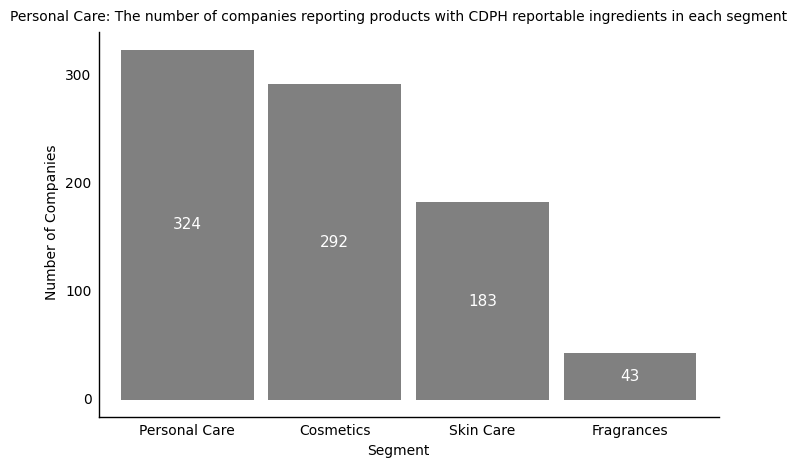

<ggplot: (8735102650576)>

In [40]:
#bar chart - # of Companies per Segment

plotnine.options.figure_size =(8,5)

Segment_list = df_chemicals_1_cat3['Segment'].tolist()

p =(
    ggplot(df_chemicals_1_cat3,aes(x='Segment',y='list_Company', label='list_Company')) # labels argument puts data labels on bars
      + geom_bar(stat='identity', fill='grey') # arranges aes() maps into bar geometry. stat='identity' means use the y aes for the
      + geom_text(position=position_stack(vjust=0.5),color='white') # adjusts the positioning and color of the data lab
      + scale_x_discrete(limits=Segment_list) # orders the categorical data in the order of thelist
      + xlab("Segment") # adds x axis label
      + ylab("Number of Companies") # adds y axis label
      + ggtitle("Personal Care: The number of companies reporting products with CDPH reportable ingredients in each segment") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic () is very simple. See for more: https://plot
      + theme(axis_line=element_line(color="black"), # further adjusts theme_classic() - axis line white 
              axis_text_y = element_text(color='black'),
              axis_ticks=element_line (color ="white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(color = 'black', size = 10))
  )

p

#Conclusion: To date, the personal care segment, with 324 companies, has the largest number of companies reporting products with CDPH reportable ingredients. 

## Cosmetics: Chemicals by Company

In [41]:
#for cosmetics determine the number of chemicals reported by each company
df_chemicals_1_cat4 = df_chemicals_cosmetics.groupby('CompanyName').agg(list_chemical=('ChemicalName','nunique'))
df_chemicals_1_cat4 = df_chemicals_1_cat4.sort_values('list_chemical', ascending=False).reset_index()

#Filter to report only companies with >5 reported ingredients
df_chemicals_1_cat4 = df_chemicals_1_cat4[df_chemicals_1_cat4['list_chemical'] > 4]  
df_chemicals_1_cat4['Number of unique chemicals'] = np.where(df_chemicals_1_cat4['list_chemical']>10, '> 10',np.where(df_chemicals_1_cat4['list_chemical']>5,'6 - 10', '5'))
df_chemicals_1_cat4

,CompanyName,list_chemical,Number of unique chemicals
0,Palladio Beauty Group,15,> 10
1,Coty,13,> 10
2,"Ventura International, Ltd",10,6 - 10
3,Fisk Industries Inc,10,6 - 10
4,"Kendo Holdings, Inc.",9,6 - 10
5,American International Industries,8,6 - 10
6,"Rituals Cosmetics USA, Inc.",7,6 - 10
7,S+,7,6 - 10
8,Tarte Cosmetics,7,6 - 10
9,Too Faced Cosmetics,7,6 - 10


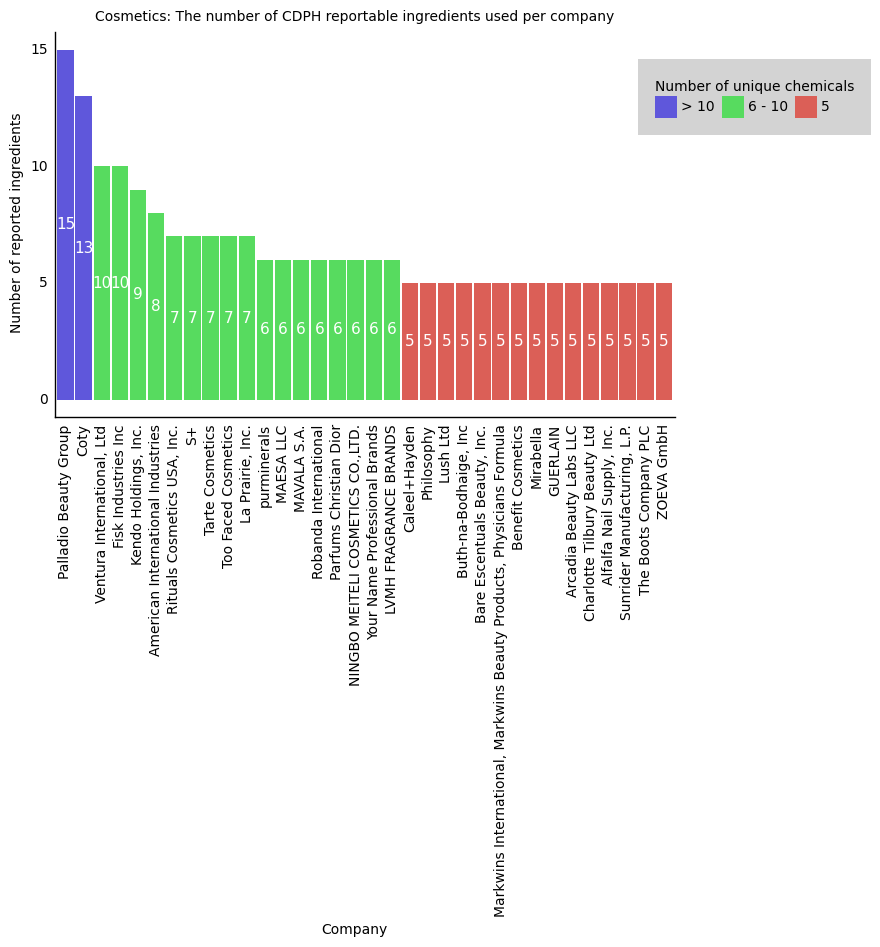

<ggplot: (8735102647854)>

In [42]:
#bar chart - Cosmetics: # of reported ingredients used per company

plotnine.options.figure_size =(8,5)

Company_list = df_chemicals_1_cat4['CompanyName'].tolist()

q =(
    ggplot(df_chemicals_1_cat4,aes(x='CompanyName',y='list_chemical', label='list_chemical', fill = 'Number of unique chemicals')) # labels argument puts data labels on bars
      + geom_bar(stat='identity') # arranges aes() maps into bar geometry. stat='identity' means use the y aes for the
      + geom_text(position=position_stack(vjust=.5),color='white') # adjusts the positioning and color of the data lab
      + scale_x_discrete(limits=Company_list) # orders the categorical data in the order of thelist
      + xlab("Company") # adds x axis label
      + ylab("Number of reported ingredients") # adds y axis label
      + ggtitle("Cosmetics: The number of CDPH reportable ingredients used per company") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic () is very simple. See for more: https://plot
      + theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=.5, color='black'),
              legend_position=(1, .75),
              legend_background = element_rect(fill="lightgrey", size=0.5, linetype="solid"),
              axis_text_y = element_text(color='black'),
              axis_line=element_line(color="black"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line (color ="white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 10))
  )

#reorder the legend
q + scale_fill_discrete(breaks=('> 10', '6 - 10', '5'))

#Conclusion: Per their products available for sale in California, Palladio Beauty Group (private), Coty (public), Ventura International, Ltd (private), and Fisk Industries Inc. (private) with 15, 13, 10, and 10 respectively, have the highest number of reported ingredients. 

In [43]:
#for cosmetics determine the number of chemicals reported by each company
df_chemicals_1_cat6 = df_chemicals_cosmetics.groupby('CompanyName').agg(list_chemical=('ChemicalName','nunique'))
df_chemicals_1_cat6 = df_chemicals_1_cat6.sort_values('CompanyName', ascending=True).reset_index()

#Filter to report only companies with <2 reported ingredients
df_chemicals_1_cat6 = df_chemicals_1_cat6[df_chemicals_1_cat6['list_chemical'] ==1]  
df_chemicals_1_cat6

#Conclusion: Of the 292 cosmetics companies registered in the CDPH database, 146 companies only have 1 reportable ingredient used across their products sold in CA. 

,CompanyName,list_chemical
0,"ALBION COSMETICS (America), Inc.",1
3,ANTONIO PUIG S.A.,1
5,"Access Business Group International, LLC",1
9,"Aloe Vera of America, Inc.",1
13,Aramis Inc.,1
...,...,...
279,Yes To Inc.,1
283,Yves Rocher Inc.,1
285,"Zalan Products, Inc.",1
287,"Zhejiang Yiwu Lucy Cosmetics Co.,Ltd.",1


In [44]:
#Which companies have only 1 reportable ingredient 
df_chemicals_1_cat6['CompanyName'].unique()

array(['ALBION COSMETICS (America), Inc.', 'ANTONIO PUIG S.A.',
       'Access Business Group International, LLC',
       'Aloe Vera of America, Inc.', 'Aramis Inc.',
       'Arcadia Beauty Labs, LLC', 'Armand Dupree Inc.',
       'Athena Cosmetics, Inc.', 'Atlas Development Limited',
       'Aubrey Organics Inc', 'Australian Gold', 'Aveda Corporation',
       'BEAUTE PRESTIGE INTERNATIONAL', 'BEAUTY SOCIETY, INC.', 'BR SAS',
       'BeautiControl, Inc.', 'Beauty Selectives',
       'Beauty Treats International Co., Inc.', 'BeautyBank Inc.',
       'Beiersdorf, Inc.', 'Bobbi Brown Professional Cosmetics, Inc.',
       'Bonne Bell, LLC', "Burt's Bees Inc.", 'C.F.E.B. SISLEY',
       'CAMEO TRADING CO., INC.', 'CCA Industries, Inc.',
       'CCS, Clean Chemical Sweden AB', 'CHANEL, INC',
       'CLINIQUE LABORATORIES, LLC',
       'Calibre Beaut�, a division of Quadrant Cosmetics Corp.',
       'Carma Laboratories', 'Centric Beauty, LLC',
       'Chantecaille Beaut� Inc', 'Chattem, Inc.'

## Cosmetics: Chemicals by SubCategory

In [45]:
#determine the number of chemicals reported in ecah subcategory within cosmetics
df_chemicals_1_cat5 = df_chemicals_cosmetics.groupby('SubCategory').agg(list_chemical=('ChemicalName','nunique'))
df_chemicals_1_cat5 = df_chemicals_1_cat5.sort_values('list_chemical', ascending=False).reset_index()
df_chemicals_1_cat5['Number of unique chemicals'] = np.where(df_chemicals_1_cat5['list_chemical']>20, '> 20',np.where(df_chemicals_1_cat5['list_chemical']>=10,'10 - 20', np.where(df_chemicals_1_cat5['list_chemical']>=5,'5 - 10', '< 5')))
df_chemicals_1_cat5

,SubCategory,list_chemical,Number of unique chemicals
0,Foundations and Bases,29,> 20
1,Eye Shadow,25,> 20
2,Eyeliner/Eyebrow Pencils,24,> 20
3,"Lip Color - Lipsticks, Liners, and Pencils",23,> 20
4,Lip Balm (making a cosmetic claim),22,> 20
5,Lip Gloss/Shine,22,> 20
6,Other Makeup Product,22,> 20
7,Blushes,21,> 20
8,Face Powders,21,> 20
9,Nail Polish and Enamel,20,10 - 20


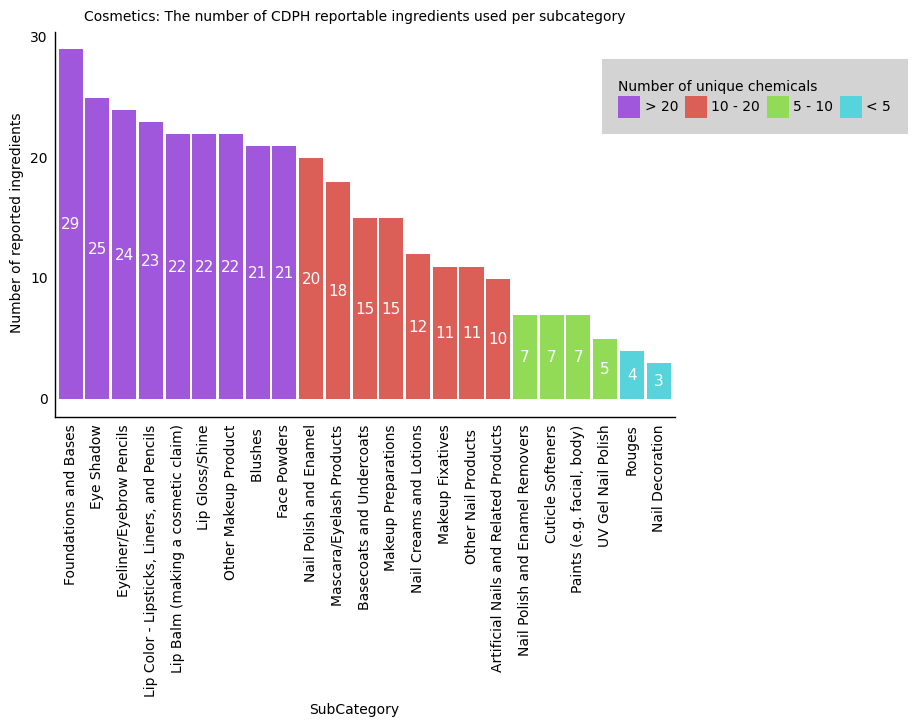

<ggplot: (8735102593470)>

In [46]:
#bar chart - Cosmetics: # of reported ingredients used per subcategory 

plotnine.options.figure_size =(8,5)

Category_list = df_chemicals_1_cat5['SubCategory'].tolist()

k =(
    ggplot(df_chemicals_1_cat5,aes(x='SubCategory',y='list_chemical', label='list_chemical', fill = 'Number of unique chemicals')) # labels argument puts data labels on bars
      + geom_bar(stat='identity') # arranges aes() maps into bar geometry. stat='identity' means use the y aes for the
      + geom_text(position=position_stack(vjust=.5),color='white') # adjusts the positioning and color of the data lab
      + scale_x_discrete(limits=Category_list) # orders the categorical data in the order of thelist
      + xlab("SubCategory") # adds x axis label
      + ylab("Number of reported ingredients") # adds y axis label
      + ggtitle("Cosmetics: The number of CDPH reportable ingredients used per subcategory") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic () is very simple. See for more: https://plot
      + theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=.5, color='black'),
              legend_position=(1, .75),
              legend_box='vertical',
              legend_background = element_rect(fill="lightgrey", size=0.5, linetype="solid"),
              axis_text_y = element_text(color='black'),
              axis_line=element_line(color="black"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line (color ="white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(color='black', size = 10))
  )

#reorder the legend
k + scale_fill_discrete(breaks=('> 20', '10 - 20', '5 - 10', '< 5'))

#Conclusion: Across the products offered by the 292 cosmetics companies who have reported ingredients via the CDPH, foundations and bases, eyeshadows, and eyeliner/eyebrow pencils with 29,25, and 24 respectively have the highest number of reported ingredients. 

# Part 7: Read Health Risk Data

In [47]:
#import "Chemicals health risks" data from the Proposition 65 List in the California Office of Environmental Health Hazard Assessment
url_3 = 'https://raw.githubusercontent.com/envirodatascience/final-project-env617_personalcareproducts/main/Chemicals_Health_Risks.csv'
df_chemicals_risks = pd.read_csv(url_3)
df_chemicals_risks

,Chemical,Type of Toxicity,CAS No.
0,"A-alpha-C (2-Amino-9H-pyrido[2,3-b]indole)",cancer,26148-68-5
1,Abiraterone acetate,"developmental, female, male",154229-18-2
2,Acetaldehyde,cancer,75-07-0
3,Acetamide,cancer,60-35-5
4,Acetazolamide,developmental,59-66-5
...,...,...,...
994,"2,6-Xylidine (2,6-Dimethylaniline)",cancer,87-62-7
995,Zalcitabine,cancer,7481-89-2
996,Zidovudine (AZT),cancer,30516-87-1
997,Zileuton,"cancer, developmental, female",111406-87-2


# Part 8: Analyze Health Risk Data

In [48]:
df_chemicals_risks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Chemical          998 non-null    object
 1   Type of Toxicity  973 non-null    object
 2   CAS No.           972 non-null    object
dtypes: object(3)
memory usage: 23.5+ KB


In [49]:
#Data Wrangling: String Manipulation
#Replace all "/" with "-" in the "CAS No." column
df_chemicals_risks['CAS No.'] = df_chemicals_risks['CAS No.'].str.replace("/", "-")
df_chemicals_risks.head()

,Chemical,Type of Toxicity,CAS No.
0,"A-alpha-C (2-Amino-9H-pyrido[2,3-b]indole)",cancer,26148-68-5
1,Abiraterone acetate,"developmental, female, male",154229-18-2
2,Acetaldehyde,cancer,75-07-0
3,Acetamide,cancer,60-35-5
4,Acetazolamide,developmental,59-66-5


In [50]:
df_chemicals_risks["Type of Toxicity"] = df_chemicals_risks["Type of Toxicity"].str.strip()

In [51]:
df_chemicals_risks["Type of Toxicity"].unique()

array(['cancer', 'developmental, female, male', 'developmental',
       'developmental, male', 'developmental, female', 'female, male',
       nan, 'female', 'male', 'cancer, developmental, female, male',
       'developmental,   male', 'cancer, developmental',
       'cancer, developmental, male', 'developmental male',
       'cancer, developmental, female'], dtype=object)

In [52]:
#Splitting up the different type of toxicity into different columns
df_chemicals_risks[['Risk_1', 'Risk_2', 'Risk_3', 'Risk_4']] = df_chemicals_risks['Type of Toxicity'].str.split(',', expand=True)

# drop the original 'Type of Toxicity' column
df_chemicals_risks = df_chemicals_risks.drop('Type of Toxicity', axis=1)

df_chemicals_risks

,Chemical,CAS No.,Risk_1,Risk_2,Risk_3,Risk_4
0,"A-alpha-C (2-Amino-9H-pyrido[2,3-b]indole)",26148-68-5,cancer,None,None,None
1,Abiraterone acetate,154229-18-2,developmental,female,male,None
2,Acetaldehyde,75-07-0,cancer,None,None,None
3,Acetamide,60-35-5,cancer,None,None,None
4,Acetazolamide,59-66-5,developmental,None,None,None
...,...,...,...,...,...,...
994,"2,6-Xylidine (2,6-Dimethylaniline)",87-62-7,cancer,None,None,None
995,Zalcitabine,7481-89-2,cancer,None,None,None
996,Zidovudine (AZT),30516-87-1,cancer,None,None,None
997,Zileuton,111406-87-2,cancer,developmental,female,None


In [53]:
#Creating bnary flags for the 4 health risks
search_string_cancer = 'cancer'
search_string_developmental = 'developmental'
search_string_female = 'female'
search_string_male = 'male'

# create a new column with binary flag
df_chemicals_risks['cancer'] = df_chemicals_risks.apply(lambda x: 1 if (search_string_cancer in [x['Risk_1'], x['Risk_2'], x['Risk_3'], x['Risk_4']]) else 0, axis=1)
df_chemicals_risks['developmental'] = df_chemicals_risks.apply(lambda x: 1 if (search_string_developmental in [x['Risk_1'], x['Risk_2'], x['Risk_3'], x['Risk_4']]) else 0, axis=1)
df_chemicals_risks['female'] = df_chemicals_risks.apply(lambda x: 1 if (search_string_female in [x['Risk_1'], x['Risk_2'], x['Risk_3'], x['Risk_4']]) else 0, axis=1)
df_chemicals_risks['male'] = df_chemicals_risks.apply(lambda x: 1 if (search_string_male in [x['Risk_1'], x['Risk_2'], x['Risk_3'], x['Risk_4']]) else 0, axis=1)
df_chemicals_risks.head()

,Chemical,CAS No.,Risk_1,Risk_2,Risk_3,Risk_4,cancer,developmental,female,male
0,"A-alpha-C (2-Amino-9H-pyrido[2,3-b]indole)",26148-68-5,cancer,None,None,None,1,0,0,0
1,Abiraterone acetate,154229-18-2,developmental,female,male,None,0,1,0,0
2,Acetaldehyde,75-07-0,cancer,None,None,None,1,0,0,0
3,Acetamide,60-35-5,cancer,None,None,None,1,0,0,0
4,Acetazolamide,59-66-5,developmental,None,None,None,0,1,0,0


In [54]:
#Join df_chemicals with df_chemicals_risks
df_chemicals_risks_merge = pd.merge(df_chemicals_1, df_chemicals_risks, left_on='CasNumber', right_on='CAS No.')
df_chemicals_risks_merge

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,Chemical,CAS No.,Risk_1,Risk_2,Risk_3,Risk_4,cancer,developmental,female,male
0,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
1,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,106,Sun-Related Products,107,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
2,1692,Pore-Perfecting Facial Polish,NaN,NaN,18,Bliss World LLC,Bliss,6,Bath Products,166,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
3,1728,Soft Focusing Lotion,NaN,NaN,18,Bliss World LLC,Laboratoire Remede,44,Makeup Products (non-permanent),50,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
4,3109,Country Peach Body and Hair Shampoo,NaN,NaN,973,Henkel Corporation,Dial,6,Bath Products,159,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157459,37068,Tom's of Maine Natural Fluoride Free SLS free ...,NaN,NaN,561,"Tom's of Maine, Inc.",Tom's of Maine,68,Oral Hygiene Products,69,...,Polygeenan,53973-98-1,cancer,None,None,None,1,0,0,0
157460,37068,Tom's of Maine Natural Fluoride Free SLS free ...,NaN,NaN,561,"Tom's of Maine, Inc.",Tom's of Maine,68,Oral Hygiene Products,69,...,Polygeenan,53973-98-1,cancer,None,None,None,1,0,0,0
157461,37068,Tom's of Maine Natural Fluoride Free SLS free ...,NaN,NaN,561,"Tom's of Maine, Inc.",Tom's of Maine,68,Oral Hygiene Products,167,...,Polygeenan,53973-98-1,cancer,None,None,None,1,0,0,0
157462,37068,Tom's of Maine Natural Fluoride Free SLS free ...,NaN,NaN,561,"Tom's of Maine, Inc.",Tom's of Maine,68,Oral Hygiene Products,167,...,Polygeenan,53973-98-1,cancer,None,None,None,1,0,0,0


In [55]:
df_chemicals_risks_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157464 entries, 0 to 157463
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  157464 non-null  int64  
 1   ProductName             157464 non-null  object 
 2   CSFId                   93937 non-null   float64
 3   CSF                     90967 non-null   object 
 4   CompanyId               157464 non-null  int64  
 5   CompanyName             157464 non-null  object 
 6   BrandName               157437 non-null  object 
 7   PrimaryCategoryId       157464 non-null  int64  
 8   PrimaryCategory         157464 non-null  object 
 9   SubCategoryId           157464 non-null  int64  
 10  SubCategory             157464 non-null  object 
 11  CasId                   157464 non-null  int64  
 12  CasNumber               4887 non-null    object 
 13  ChemicalId              157464 non-null  int64  
 14  ChemicalName        

In [56]:
#Which primary category of personal care product cosnsits of the highest proportion of chemicals with cancer and developmental risk
df_prim_category_chemicals_risks = df_chemicals_risks_merge.groupby('PrimaryCategory', as_index=False).agg(avg_cancer=('cancer','mean'),avg_developmental=('developmental','mean'))
df_prim_category_chemicals_risks[['avg_cancer','avg_developmental']] = round(df_prim_category_chemicals_risks[['avg_cancer','avg_developmental']], 3)
df_prim_category_chemicals_risks.reset_index()

,index,PrimaryCategory,avg_cancer,avg_developmental
0,0,Baby Products,0.017,0.036
1,1,Bath Products,0.013,0.038
2,2,Fragrances,0.082,0.035
3,3,Hair Care Products (non-coloring),0.037,0.043
4,4,Hair Coloring Products,0.151,0.031
5,5,Makeup Products (non-permanent),0.028,0.037
6,6,Nail Products,0.037,0.038
7,7,Oral Hygiene Products,0.004,0.037
8,8,Personal Care Products,0.015,0.036
9,9,Shaving Products,0.063,0.045


In [57]:
#Which segment has the highest proportion of chemicals with cancer and developmental risk
df_segment_chemicals_risks = df_chemicals_risks_merge.groupby('Segment', as_index=False).agg(avg_cancer=('cancer','mean'),avg_developmental=('developmental','mean'))
df_segment_chemicals_risks[['avg_cancer','avg_developmental']] = round(df_segment_chemicals_risks[['avg_cancer','avg_developmental']], 3)
df_segment_chemicals_risks.reset_index()

,index,Segment,avg_cancer,avg_developmental
0,0,Cosmetics,0.030,0.037
1,1,Fragrances,0.082,0.035
2,2,Personal Care,0.024,0.039
3,3,Skin Care,0.014,0.037


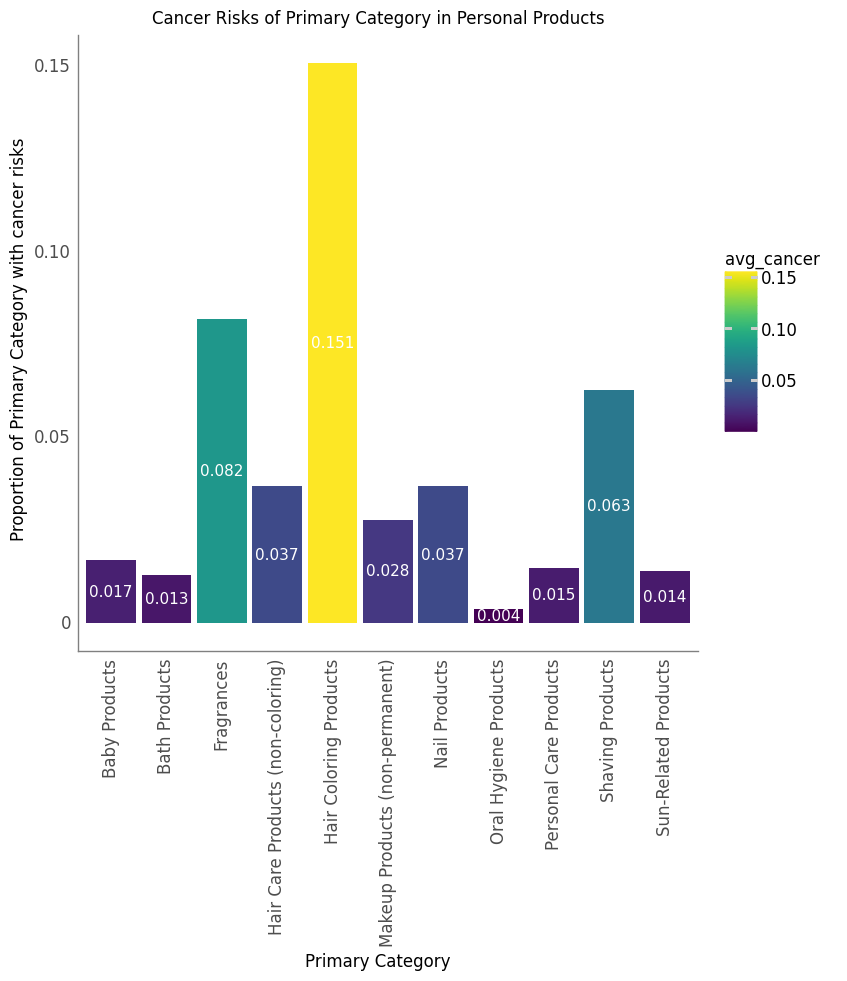

<ggplot: (8735104876370)>

In [58]:
#bar chart - Proportion of reported ingredients with cancer risks per primary category
plotnine.options.figure_size = (8, 8)

p= (
    ggplot(df_prim_category_chemicals_risks, aes(x='PrimaryCategory', y='avg_cancer', label='avg_cancer', fill = 'avg_cancer')) # labels argument puts data labels on bars 
      + geom_bar(stat='identity') # arranges aes() maps into bar geometry
      + geom_text(position=position_stack(vjust=.5), color='white') # adjusts the positioning and color of the data labels
      + xlab("Primary Category") # adds x axis label
      + ylab("Proportion of Primary Category with cancer risks") # adds y axis label
      + ggtitle("Cancer Risks of Primary Category in Personal Products") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=.5),
              axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line (color ="white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 12))
  ) 
p

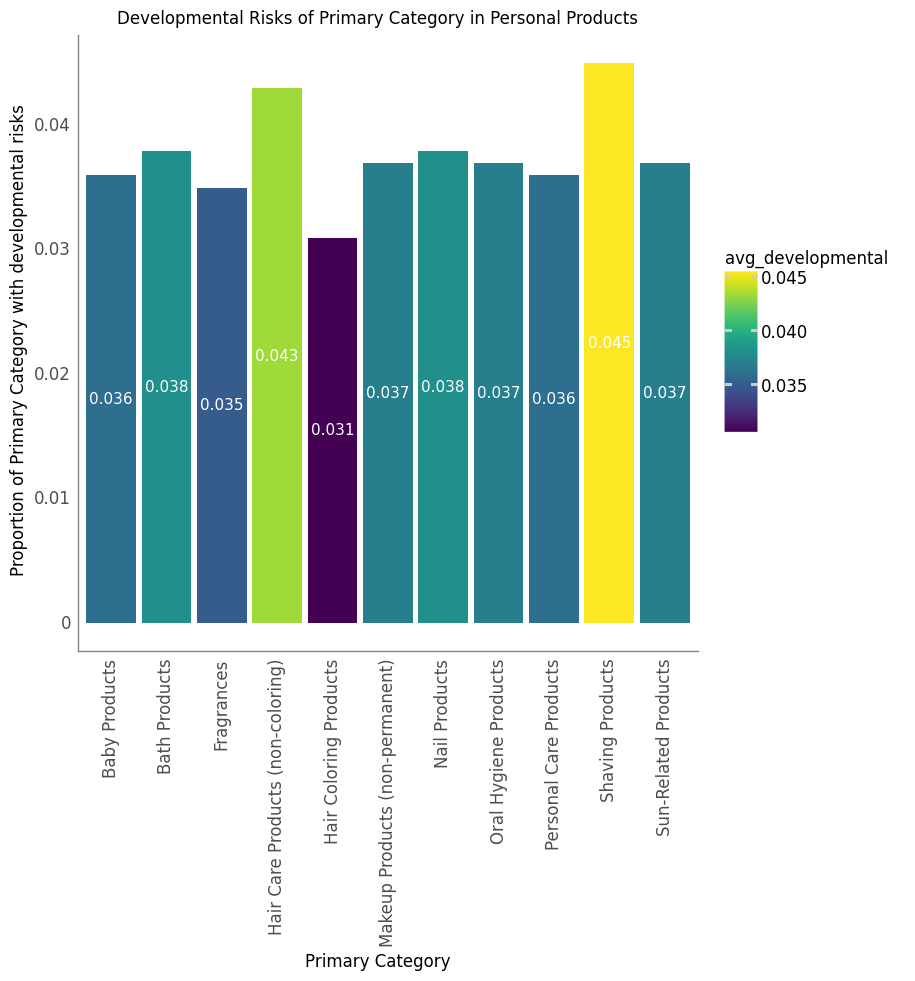

<ggplot: (8735102374524)>

In [59]:
#bar chart - Proportion of reported ingredients with developmental risks per primary category
plotnine.options.figure_size = (8, 8)

p= (
    ggplot(df_prim_category_chemicals_risks, aes(x='PrimaryCategory', y='avg_developmental', label='avg_developmental', fill = 'avg_developmental')) # labels argument puts data labels on bars 
      + geom_bar(stat='identity') # arranges aes() maps into bar geometry
      + geom_text(position=position_stack(vjust=.5), color='white') # adjusts the positioning and color of the data labels
      + xlab("Primary Category") # adds x axis label
      + ylab("Proportion of Primary Category with developmental risks") # adds y axis label
      + ggtitle("Developmental Risks of Primary Category in Personal Products") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=.5),
              axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line (color ="white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 12))
  ) 

p

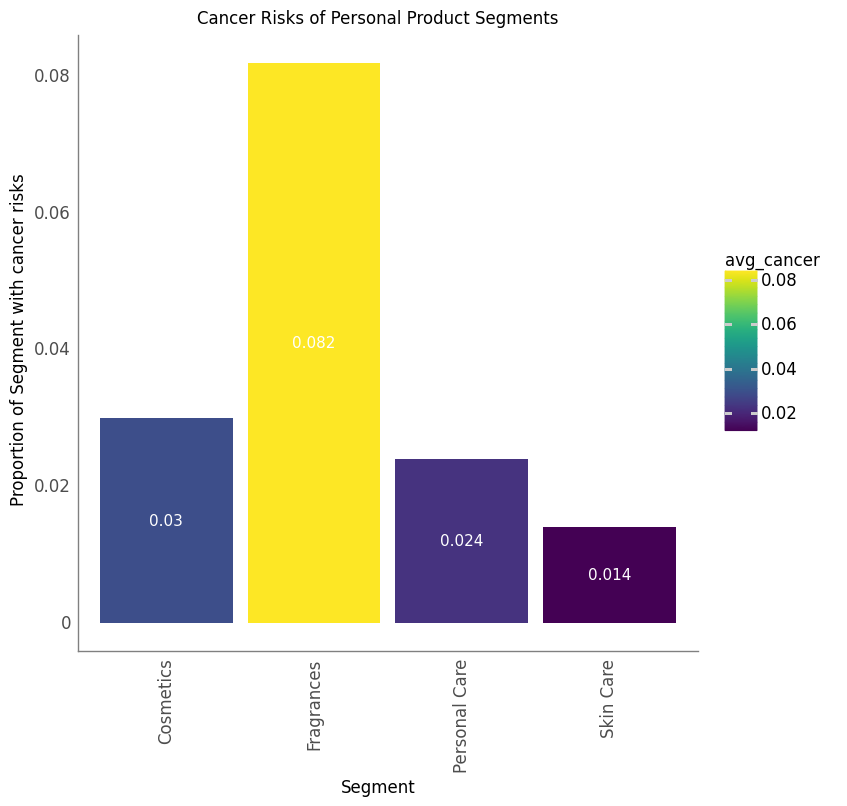

<ggplot: (8735102299986)>

In [60]:
#bar chart - Proportion reported ingredients with cancer risks per segment
plotnine.options.figure_size = (8, 8)

p= (
    ggplot(df_segment_chemicals_risks, aes(x='Segment', y='avg_cancer', label='avg_cancer', fill = 'avg_cancer')) # labels argument puts data labels on bars 
      + geom_bar(stat='identity') # arranges aes() maps into bar geometry
      + geom_text(position=position_stack(vjust=.5), color='white') # adjusts the positioning and color of the data labels
      + xlab("Segment") # adds x axis label
      + ylab("Proportion of Segment with cancer risks") # adds y axis label
      + ggtitle("Cancer Risks of Personal Product Segments") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=.5),
              axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line (color ="white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 12))
  ) 

p

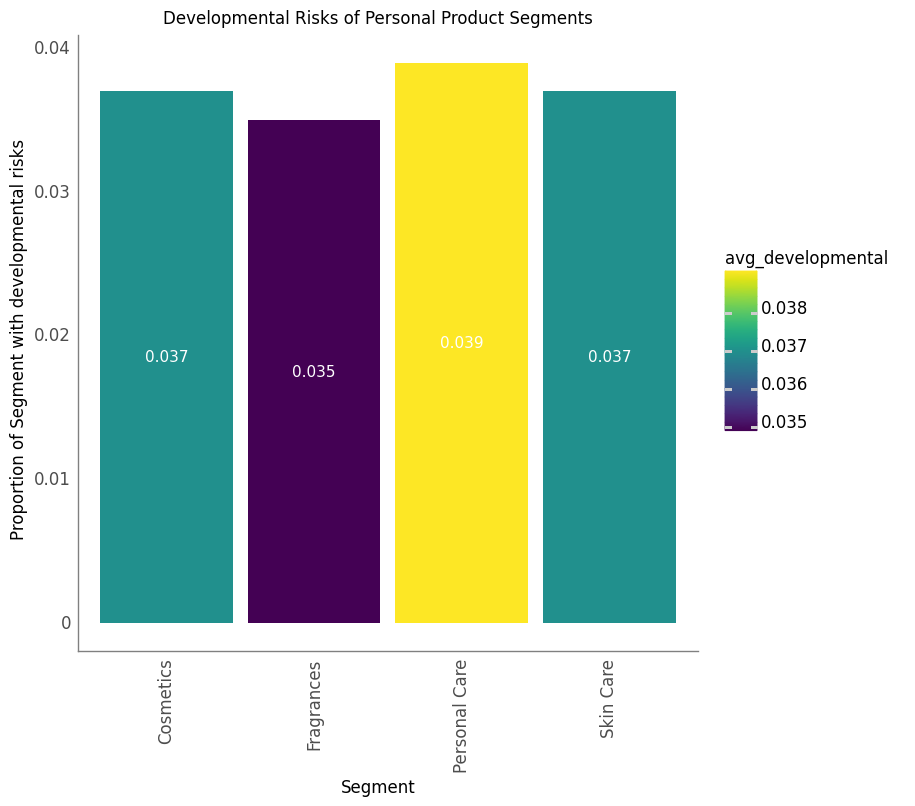

<ggplot: (8735102279057)>

In [61]:
#bar chart - # of reported ingredients with developmental risks per segment
plotnine.options.figure_size = (8, 8)

p= (
    ggplot(df_segment_chemicals_risks, aes(x='Segment', y='avg_developmental', label='avg_developmental', fill = 'avg_developmental')) # labels argument puts data labels on bars 
      + geom_bar(stat='identity') # arranges aes() maps into bar geometry
      + geom_text(position=position_stack(vjust=.5), color='white') # adjusts the positioning and color of the data labels
      + xlab("Segment") # adds x axis label
      + ylab("Proportion of Segment with developmental risks") # adds y axis label
      + ggtitle("Developmental Risks of Personal Product Segments") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=.5),
              axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line (color ="white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 12))
  ) 

p

# Part 9: Read ESG Scoring Data

## Mount drive for large dataset file access

In [62]:
# mount Cicy's google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Company and ID mapping

In [102]:
url_institution = 'https://raw.githubusercontent.com/envirodatascience/final-project-env617_personalcareproducts/main/comp_institutionid.csv'
url_gvkey = 'https://raw.githubusercontent.com/envirodatascience/final-project-env617_personalcareproducts/main/comp_pc.csv'
url_mapping = '/content/drive/MyDrive/trucost_map.csv'

df_mapping = pd.read_csv(url_mapping)

<ipython-input-102-10fe9050a843>:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.


In [103]:
df_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21985231 entries, 0 to 21985230
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   companyid      float64
 1   companyname    object 
 2   gvkey          float64
 3   institutionid  float64
 4   ticker         object 
dtypes: float64(3), object(2)
memory usage: 838.7+ MB


## ESG data preview 

In [104]:
url_esg = 'https://raw.githubusercontent.com/envirodatascience/final-project-env617_personalcareproducts/main/esg_pc.csv'
df_esg = pd.read_csv(url_esg)

In [105]:
df_esg.head()

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,...,msacasedate,msacasetitle,msacasescore,msacaseimpactlevelname,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact
0,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,727DCB7A-FD6D-4ACB-A8F7-4EC61B3250E7,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25232 entries, 0 to 25231
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   scoreid                        25232 non-null  object 
 1   dimensionscoreid               25232 non-null  object 
 2   criteriascoreid                21916 non-null  object 
 3   institutionid                  25232 non-null  float64
 4   assessmentyear                 25232 non-null  float64
 5   scoredate                      25232 non-null  object 
 6   mostrecentsequence             25232 non-null  float64
 7   csaindustrymapid               25232 non-null  object 
 8   csaindustryname                25232 non-null  object 
 9   csaindustrygroupname           25232 non-null  object 
 10  csaindustryclassificationname  25232 non-null  object 
 11  csasectorname                  25232 non-null  object 
 12  campaignname                   25232 non-null 

In [107]:
df_esg.shape

(25232, 40)

In [108]:
df_esg[df_esg.duplicated() == True].head()

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,...,msacasedate,msacasetitle,msacasescore,msacaseimpactlevelname,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact


## Map company identifiers to ESG dataset
companyid, companyname, gvkey, institutionid, ticker

In [109]:
df_esg_id = df_esg.merge(df_mapping, on = 'institutionid', how = 'left')
df_esg_id.head()

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,...,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact,companyid,companyname,gvkey,ticker
0,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
1,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
2,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
3,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
4,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,727DCB7A-FD6D-4ACB-A8F7-4EC61B3250E7,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR


In [110]:
df_esg_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26381 entries, 0 to 26380
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   scoreid                        26381 non-null  object 
 1   dimensionscoreid               26381 non-null  object 
 2   criteriascoreid                22901 non-null  object 
 3   institutionid                  26381 non-null  float64
 4   assessmentyear                 26381 non-null  float64
 5   scoredate                      26381 non-null  object 
 6   mostrecentsequence             26381 non-null  float64
 7   csaindustrymapid               26381 non-null  object 
 8   csaindustryname                26381 non-null  object 
 9   csaindustrygroupname           26381 non-null  object 
 10  csaindustryclassificationname  26381 non-null  object 
 11  csasectorname                  26381 non-null  object 
 12  campaignname                   26381 non-null 

In [111]:
df_esg_id.nunique()

scoreid                            474
dimensionscoreid                   829
criteriascoreid                  21916
institutionid                       95
assessmentyear                      10
scoredate                           39
mostrecentsequence                   2
csaindustrymapid                     1
csaindustryname                      1
csaindustrygroupname                 1
csaindustryclassificationname        1
csasectorname                        1
campaignname                        38
campaignstartdate                   31
campaignenddate                     36
campaigntypename                     2
campaigntypecode                     2
csasharinglevelname                  4
csascoretypename                     2
scoretype                            3
dimensionname                        5
aspectname                          36
aspectnote                           2
scorevalue                         101
scoreweight                         22
scoreyoy                 

In [112]:
# Get the unique values in the selected columns
df_esg_id.apply(lambda x: pd.Series.unique(x))

scoreid                          [C18CAC1C-88B3-4592-A29B-348546CA39E3, AB36AB3...
dimensionscoreid                 [DD0573DD-AFCA-48AD-8280-0A60FA0B733A, 5985095...
criteriascoreid                  [nan, 727DCB7A-FD6D-4ACB-A8F7-4EC61B3250E7, 40...
institutionid                    [4004199.0, 4008274.0, 4067766.0, 4220757.0, 4...
assessmentyear                   [2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021....
scoredate                        [2016-09-08, 2017-09-07, 2018-09-13, 2019-09-1...
mostrecentsequence                                                      [1.0, 0.0]
csaindustrymapid                            [4BA14AB6-C1AD-4B73-A16F-4C9351679259]
csaindustryname                                            [COS Personal Products]
csaindustrygroupname                               [Household & Personal Products]
csaindustryclassificationname                                           [SAM GICS]
csasectorname                                                   [Consumer Staples]
camp

In [139]:
df_esg_id[df_esg_id.duplicated()]

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,...,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact,companyid,companyname,gvkey,ticker


## Refine ESG Dataset

In [154]:
# df_esg_work = df_esg_id[['companyname', 'industryrank','scorevalue', 'scoreest','scoreestwtd', 'scoreweight', 'dimensionname','aspectname','scoretype','assessmentyear', 'campaignname','gvkey','ticker','companyid', 'institutionid']]

In [155]:
# df_esg_work.info()

In [156]:
# df_esg_work.nunique()

In [157]:
# df_esg_work[df_esg_work.duplicated()]

In [158]:
# df_esg_work = df_esg_work.drop_duplicates()

In [159]:
# These three institutions have investment/AM arm listed separately

comp_id = df_esg_id.groupby('institutionid').agg(num_companynames = ('companyname','nunique')).reset_index()
comp_id[comp_id.num_companynames > 1]

,institutionid,num_companynames


In [160]:
df_esg_id[df_esg_id.institutionid == 4199027.0]

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,...,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact,companyid,companyname,gvkey,ticker
1066,5CC7BA19-A61F-4EC7-AF45-5F76FD45A3C5,AEE57AA0-2569-4C3E-A297-38050C97CFB6,NaN,4199027.0,2018.0,2018-09-13,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,874249.0,L'Oréal S.A.,100581.0,OR
1068,B2488AD2-4FDA-4D7A-95D4-AA8442BDEC30,D9ED107E-47C7-43EB-B3E2-CFFB96B4BD03,NaN,4199027.0,2020.0,2020-11-13,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,874249.0,L'Oréal S.A.,100581.0,OR
1070,B2488AD2-4FDA-4D7A-95D4-AA8442BDEC30,D9ED107E-47C7-43EB-B3E2-CFFB96B4BD03,NaN,4199027.0,2020.0,2020-11-13,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,874249.0,L'Oréal S.A.,100581.0,OR
1072,631FEAE9-DF24-44F8-A113-1C4508CF13CD,501E8E51-E82E-4611-A826-7E6892C6F097,75F20604-19A1-4B5E-9003-A8C9B845F669,4199027.0,2013.0,2013-09-12,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,874249.0,L'Oréal S.A.,100581.0,OR
1074,631FEAE9-DF24-44F8-A113-1C4508CF13CD,E56E2D71-4FCC-4F1C-A521-E1E2E530C717,NaN,4199027.0,2013.0,2013-09-12,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,874249.0,L'Oréal S.A.,100581.0,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,81AAC8F3-144C-40A7-A512-6D7A62083A75,E78E5F4E-C5C3-4837-ABA4-CD459F9ADBEE,DD23A2F6-31C7-4928-BF58-F2D8DE58C75D,4199027.0,2022.0,2022-10-21,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,874249.0,L'Oréal S.A.,100581.0,OR
4068,81AAC8F3-144C-40A7-A512-6D7A62083A75,E78E5F4E-C5C3-4837-ABA4-CD459F9ADBEE,374E6F9D-E114-4FD0-8BF0-1CE3F82EEC0A,4199027.0,2022.0,2022-10-21,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,874249.0,L'Oréal S.A.,100581.0,OR
4070,81AAC8F3-144C-40A7-A512-6D7A62083A75,E78E5F4E-C5C3-4837-ABA4-CD459F9ADBEE,470D2A71-B040-4F8A-823C-B9B6665293BB,4199027.0,2022.0,2022-10-21,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,874249.0,L'Oréal S.A.,100581.0,OR
4072,81AAC8F3-144C-40A7-A512-6D7A62083A75,E78E5F4E-C5C3-4837-ABA4-CD459F9ADBEE,53949AC9-F6DA-44E8-B919-17D0EF7D059A,4199027.0,2022.0,2022-10-21,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,874249.0,L'Oréal S.A.,100581.0,OR


In [161]:
df_esg_id[df_esg_id.institutionid == 4910447.0]

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,...,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact,companyid,companyname,gvkey,ticker
7455,FAF1558A-61EC-448B-A76D-30C608404A5E,341B0880-028A-4F16-9810-9882C1B377E2,NaN,4910447.0,2013.0,2014-03-18,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,9938532.0,Herbalife Nutrition Ltd.,14269.0,HLF
7457,FAF1558A-61EC-448B-A76D-30C608404A5E,341B0880-028A-4F16-9810-9882C1B377E2,NaN,4910447.0,2013.0,2014-03-18,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,9938532.0,Herbalife Nutrition Ltd.,14269.0,HLF
7459,FAF1558A-61EC-448B-A76D-30C608404A5E,341B0880-028A-4F16-9810-9882C1B377E2,NaN,4910447.0,2013.0,2014-03-18,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,9938532.0,Herbalife Nutrition Ltd.,14269.0,HLF
7461,FAF1558A-61EC-448B-A76D-30C608404A5E,341B0880-028A-4F16-9810-9882C1B377E2,NaN,4910447.0,2013.0,2014-03-18,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,9938532.0,Herbalife Nutrition Ltd.,14269.0,HLF
7463,FAF1558A-61EC-448B-A76D-30C608404A5E,341B0880-028A-4F16-9810-9882C1B377E2,A6286761-CE08-47D2-8014-A3D14697C2FD,4910447.0,2013.0,2014-03-18,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,9938532.0,Herbalife Nutrition Ltd.,14269.0,HLF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,52008D42-53ED-4053-A678-D3F6263EB91B,40445E55-6004-44A9-9EBB-C1E07029461F,C1B48650-7E2F-404A-A109-85664EC7B730,4910447.0,2022.0,2022-11-18,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,9938532.0,Herbalife Nutrition Ltd.,14269.0,HLF
8297,52008D42-53ED-4053-A678-D3F6263EB91B,40445E55-6004-44A9-9EBB-C1E07029461F,E551D0DD-2EA6-43C7-A209-A475387C8335,4910447.0,2022.0,2022-11-18,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,9938532.0,Herbalife Nutrition Ltd.,14269.0,HLF
8299,52008D42-53ED-4053-A678-D3F6263EB91B,40445E55-6004-44A9-9EBB-C1E07029461F,6398978A-77E3-41C4-9F0C-5421E589174B,4910447.0,2022.0,2022-11-18,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,9938532.0,Herbalife Nutrition Ltd.,14269.0,HLF
8301,52008D42-53ED-4053-A678-D3F6263EB91B,40445E55-6004-44A9-9EBB-C1E07029461F,042764DD-58D1-4CEA-A071-863D0E7E23BA,4910447.0,2022.0,2022-11-18,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,9938532.0,Herbalife Nutrition Ltd.,14269.0,HLF


In [162]:
df_esg_id[df_esg_id.institutionid == 4971041.0]

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,...,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact,companyid,companyname,gvkey,ticker
25212,E65E04F7-1E97-46E2-8252-F3F1FC2566FE,C0437A68-9190-4EA4-B1A1-6166100EB887,NaN,4971041.0,2015.0,2016-03-16,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,34669017.0,Hypera S.A.,288674.0,HYPE3
25214,E65E04F7-1E97-46E2-8252-F3F1FC2566FE,9D736D50-13A8-456C-9B7D-D2FBED0AC0F8,NaN,4971041.0,2015.0,2016-03-16,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,34669017.0,Hypera S.A.,288674.0,HYPE3
25216,E65E04F7-1E97-46E2-8252-F3F1FC2566FE,9D736D50-13A8-456C-9B7D-D2FBED0AC0F8,NaN,4971041.0,2015.0,2016-03-16,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,34669017.0,Hypera S.A.,288674.0,HYPE3
25218,E65E04F7-1E97-46E2-8252-F3F1FC2566FE,9D736D50-13A8-456C-9B7D-D2FBED0AC0F8,NaN,4971041.0,2015.0,2016-03-16,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,34669017.0,Hypera S.A.,288674.0,HYPE3
25220,E65E04F7-1E97-46E2-8252-F3F1FC2566FE,9D736D50-13A8-456C-9B7D-D2FBED0AC0F8,NaN,4971041.0,2015.0,2016-03-16,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,34669017.0,Hypera S.A.,288674.0,HYPE3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26371,82259045-E20D-45E9-AA28-3383AC3B319C,ADC87FBD-51A3-45A5-B7B2-D5063CD03C21,B2FA942E-EDDE-4C5C-A006-748C12F94ADC,4971041.0,2016.0,2017-04-19,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,34669017.0,Hypera S.A.,288674.0,HYPE3
26373,82259045-E20D-45E9-AA28-3383AC3B319C,ADC87FBD-51A3-45A5-B7B2-D5063CD03C21,083D29EB-A89C-4421-9CE0-8BF58576CD0C,4971041.0,2016.0,2017-04-19,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,34669017.0,Hypera S.A.,288674.0,HYPE3
26375,82259045-E20D-45E9-AA28-3383AC3B319C,ADC87FBD-51A3-45A5-B7B2-D5063CD03C21,5B62A7F7-B2FC-4E18-BCBC-9240FC0C2D9E,4971041.0,2016.0,2017-04-19,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,34669017.0,Hypera S.A.,288674.0,HYPE3
26377,82259045-E20D-45E9-AA28-3383AC3B319C,ADC87FBD-51A3-45A5-B7B2-D5063CD03C21,912B449C-5D35-4BDB-888B-F695205667E9,4971041.0,2016.0,2017-04-19,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,34669017.0,Hypera S.A.,288674.0,HYPE3


In [163]:
# drop the AM/Investment arm as they are not directly related to personal care products
df_esg_id = df_esg_id[~df_esg_id.companyname.isin(["L'Oreal SA, Asset Management Arm", "Herbalife Ltd., Investment Arm","Hypera S.A., Investment Arm"])]

In [164]:
df_esg_id.describe()

,institutionid,assessmentyear,mostrecentsequence,scorevalue,scoreweight,scoreyoy,industryrank,scoreest,scoreestwtd,msacasescore,msacaseimpactrating,msacaseresponserating,criteriascoreimpact,companyid,gvkey
count,2.530000e+04,25300.000000,25300.000000,24659.000000,24469.000000,18319.000000,24659.000000,10683.000000,1424.000000,20.00000,20.000000,20.00000,19.000000,2.530000e+04,25131.000000
mean,5.010471e+06,2019.397549,0.875415,27.911797,6.792268,1.494623,19.536518,50.318731,12.817416,48.50000,10.000000,14.00000,13.157895,5.376782e+07,197585.060801
std,1.912348e+06,2.502581,0.330254,26.282976,9.861799,13.415869,16.333541,34.429213,5.341765,27.96144,7.947194,7.53937,9.056999,1.081793e+08,104185.779722
min,4.004199e+06,2013.000000,0.000000,0.000000,1.000000,-100.000000,1.000000,0.000000,1.000000,10.00000,0.000000,10.00000,0.000000,3.381300e+04,10846.000000
25%,4.813086e+06,2017.000000,1.000000,4.000000,2.000000,-3.000000,7.000000,25.000000,9.000000,10.00000,0.000000,10.00000,9.500000,8.781540e+05,100581.000000
50%,4.912805e+06,2020.000000,1.000000,23.000000,4.000000,0.000000,16.000000,50.000000,13.000000,50.00000,10.000000,10.00000,11.000000,3.608706e+06,221183.000000
75%,4.915281e+06,2022.000000,1.000000,43.000000,6.000000,5.000000,28.000000,75.000000,17.000000,70.00000,20.000000,12.50000,16.000000,3.590527e+07,292763.000000
max,2.620657e+07,2022.000000,1.000000,100.000000,53.000000,100.000000,91.000000,100.000000,30.000000,90.00000,20.000000,30.00000,41.000000,6.935749e+08,347222.000000


In [165]:
df_esg_id.head(10)

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,...,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact,companyid,companyname,gvkey,ticker
0,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
1,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
2,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
3,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,NaN,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
4,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,727DCB7A-FD6D-4ACB-A8F7-4EC61B3250E7,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
5,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,408E3FD5-D3F4-4EEC-B7B9-C5BFC80424BB,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
6,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,1626AA8A-C290-47D2-82AD-CC20EE16ABC3,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
7,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,D539C76F-B961-4C8F-AB2C-DE9AFA03296C,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
8,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,9232FB7C-6EB8-4CF4-989D-26E0B33B1D75,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR
9,C18CAC1C-88B3-4592-A29B-348546CA39E3,DD0573DD-AFCA-48AD-8280-0A60FA0B733A,0C97A6B5-B398-4B34-8689-25C810BF5A96,4004199.0,2016.0,2016-09-08,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,...,NaN,NaN,NaN,NaN,NaN,NaN,523191.0,Unilever PLC,10846.0,ULVR


# Part 10: Analyze ESG Scoring Data

## Explore ESG dataset

In [166]:
# each dimension include what aspect
# groupyby 

asp_dim = df_esg_id[df_esg_id.scoretype == 'Criteria'][['dimensionname', 'aspectname']]

asp_dim = asp_dim.drop_duplicates()

asp_dim.sort_values(by = 'dimensionname')

,dimensionname,aspectname
4,Environmental Dimension,Environmental Policy & Management Systems
184,Environmental Dimension,Food Loss & Waste
247,Environmental Dimension,Biodiversity
8,Environmental Dimension,Product Stewardship
59,Environmental Dimension,Climate Strategy
5,Environmental Dimension,Environmental Reporting
6,Environmental Dimension,Operational Eco-Efficiency
7,Environmental Dimension,Packaging
9,Governance & Economic Dimension,Brand Management
39,Governance & Economic Dimension,Impact Measurement & Valuation


In [167]:
asp_dim.groupby('dimensionname').agg(num_criteria = ('aspectname','nunique')).reset_index()

,dimensionname,num_criteria
0,Environmental Dimension,8
1,Governance & Economic Dimension,15
2,Social Dimension,11


Key points:
- S&P Global ESG Score is the overall ESG score, including three dimensions: economic governance, enviromental, and social, with indicated score weight.
- Each dimension include various criteria; each company may have different criteria inclusion.
>- Environmental dimension includes up to 8 criteria.
>- Governance & Economic dimension includes up to 15 criteria.
>- Social dimension includes up to 11 criteria.







#### Questions about assessment year and criteria:
- How many companies reported or published ESG score in different years?
- How many companies are using SP ESG score, and each of the three dimensions, between 2013-2022?
- How many companies are using each of criteria, between 2013 - 2022?

In [168]:
# how many companies reported or published ESG scores in different years?

df_esg_id.groupby('assessmentyear').agg(num_companies = ('institutionid','nunique')).reset_index()

,assessmentyear,num_companies
0,2013.0,14
1,2014.0,13
2,2015.0,27
3,2016.0,27
4,2017.0,32
5,2018.0,33
6,2019.0,45
7,2020.0,57
8,2021.0,74
9,2022.0,91


In [169]:
# How many companies are using SP ESG score, and each of the three dimensions, between 2013-2022?

df_esg_id.groupby('dimensionname').agg(num_companies = ('institutionid','nunique')).reset_index()

,dimensionname,num_companies
0,Economic Governance Dimension,95
1,Environmental Dimension,95
2,Governance & Economic Dimension,95
3,S&P Global ESG Score,95
4,Social Dimension,95


> Note: 
- Economic Governance Dimension is specifically used for the overall governance score
- Governance & Economic Dimension is used with corresponding criteria

In [170]:
# How many companies are using each of criteria, between 2013 - 2022?

df_esg_id[~df_esg_id.aspectname.isin(['S&P Global ESG Score' , 'Economic Governance Dimension' , 'Environmental Dimension' , 'Social Dimension'])].groupby('aspectname').agg(num_companies = ('institutionid','nunique')).reset_index()

,aspectname,num_companies
0,Biodiversity,91
1,Brand Management,77
2,Business Ethics,95
3,Climate Strategy,94
4,Corporate Citizenship & Philanthropy,95
5,Corporate Governance,95
6,Customer Relationship Management,95
7,Environmental Policy & Management Systems,95
8,Environmental Reporting,95
9,Food Loss & Waste,92


#### Questions about ESG score trends

- Over the years from 2013 to 2022, what is each company's avg SP ESG score and avg SP ESG industry rank?
- Do companies have different weighting over the years?

>> 
- Do companies have different criteria for each dimension?
- Does the same company change the weighting of ESG scores over time?
- Does the same company change (add) criteria for the same dimension over time?

In [171]:
# Over the years from 2013 to 2022, what is each company's avg SP ESG score and avg SP ESG industry rank?

# Filter the working dataset to contain only SP ESG scores
df_spesg = df_esg_id[df_esg_id.dimensionname == 'S&P Global ESG Score']

# Group
df_spesg.groupby('companyname').agg( avg_score = ('scorevalue','mean'), avg_rank = ('industryrank','mean')).reset_index()

,companyname,avg_score,avg_rank
0,AMOREPACIFIC Group,42.666667,6.208333
1,"Able C&C Co., Ltd.",19.750000,32.000000
2,"Adjuvant Holdings Co.,Ltd.",5.500000,72.500000
3,Amorepacific Corporation,78.153846,3.076923
4,Artnature Inc.,9.500000,57.500000
...,...,...,...
90,Unilever PLC,87.444444,1.111111
91,Ya-Man Ltd.,6.250000,42.083333
92,Yatsen Holding Limited,14.750000,42.000000
93,Yunnan Botanee Bio-Technology Group Co.LTD,23.000000,32.000000


In [172]:
# Do companies have different weighting?

# create a df only contains the three dimensions
df_temp = df_esg_id[df_esg_id.aspectname.isin(['Economic Governance Dimension','Environmental Dimension','Social Dimension'])]
df_temp.nunique()

scoreid                          474
dimensionscoreid                 829
criteriascoreid                    0
institutionid                     95
assessmentyear                    10
scoredate                         39
mostrecentsequence                 2
csaindustrymapid                   1
csaindustryname                    1
csaindustrygroupname               1
csaindustryclassificationname      1
csasectorname                      1
campaignname                      38
campaignstartdate                 31
campaignenddate                   36
campaigntypename                   2
campaigntypecode                   2
csasharinglevelname                4
csascoretypename                   2
scoretype                          1
dimensionname                      3
aspectname                         3
aspectnote                         0
scorevalue                        98
scoreweight                       14
scoreyoy                          65
industryrank                      81
s

In [173]:
df_temp.dimensionname.unique()

array(['Economic Governance Dimension', 'Environmental Dimension',
       'Social Dimension'], dtype=object)

In [174]:
# Groupby company and dimension

df_weighting = df_temp.groupby(['institutionid','dimensionname']).agg(nunique_scoreweight = ('scoreweight', 'nunique'),num_assessmentyears = ('assessmentyear','count')).reset_index()

In [175]:
# num_year > 1 and nunique_scoreweight == 1

df_weighting[(df_weighting.num_assessmentyears == 1) & (df_weighting['nunique_scoreweight'] != 1)]

,institutionid,dimensionname,nunique_scoreweight,num_assessmentyears


> Weightings have changed over the years for all companies.

## Merge ESG scores with company chemicals and health risks

To focus on the holistic view of ESG performance with comparable timeframe, we will only use the overall ESG score assessed in 2022.

In [179]:
# filter the ESG working dataset to include only 2022 SP ESG scores 
df_spesg_2022 = df_esg_id[(df_esg_id.assessmentyear == 2022) & (df_esg_id['dimensionname'] == 'S&P Global ESG Score')]

In [177]:
df_spesg_2022[df_spesg_2022.duplicated()]

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,...,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact,companyid,companyname,gvkey,ticker


In [181]:
df_spesg_2022.nunique()

scoreid                          115
dimensionscoreid                 190
criteriascoreid                    0
institutionid                     91
assessmentyear                     1
scoredate                          7
mostrecentsequence                 2
csaindustrymapid                   1
csaindustryname                    1
csaindustrygroupname               1
csaindustryclassificationname      1
csasectorname                      1
campaignname                       7
campaignstartdate                  5
campaignenddate                    6
campaigntypename                   2
campaigntypecode                   2
csasharinglevelname                3
csascoretypename                   2
scoretype                          1
dimensionname                      1
aspectname                         1
aspectnote                         0
scorevalue                        58
scoreweight                        0
scoreyoy                          29
industryrank                      57
s

In [183]:
df_spesg_2022.groupby('companyname').agg(nunique_scorevalue = ('scorevalue','nunique'))

,nunique_scorevalue
companyname,
AMOREPACIFIC Group,2
"Able C&C Co., Ltd.",2
"Adjuvant Holdings Co.,Ltd.",2
Amorepacific Corporation,2
Artnature Inc.,2
...,...
Unilever PLC,1
Ya-Man Ltd.,3
Yatsen Holding Limited,2


In [185]:
pd.set_option('display.max_columns', None)

df_spesg_2022[df_spesg_2022.companyname == 'Ya-Man Ltd.']

,scoreid,dimensionscoreid,criteriascoreid,institutionid,assessmentyear,scoredate,mostrecentsequence,csaindustrymapid,csaindustryname,csaindustrygroupname,csaindustryclassificationname,csasectorname,campaignname,campaignstartdate,campaignenddate,campaigntypename,campaigntypecode,csasharinglevelname,csascoretypename,scoretype,dimensionname,aspectname,aspectnote,scorevalue,scoreweight,scoreyoy,industryrank,scoreest,scoreestwtd,msacaseid,msacasedate,msacasetitle,msacasescore,msacaseimpactlevelname,msacaseimpactrating,msacaseresponsename,msacaseresponserating,msaimpactid,msaimpactdate,criteriascoreimpact,companyid,companyname,gvkey,ticker
6209,44AA22DA-410B-4C09-9CA5-2D30552E7455,5EC332F6-4D14-4D9D-8607-617503C7514F,NaN,4279078.0,2022.0,2022-09-23,0.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,SAM GICS,Consumer Staples,ESG Indices SA 2022,2022-04-02,2022-10-28,Public Assessment,SA,All,Modeled,S&P Global ESG Score,S&P Global ESG Score,S&P Global ESG Score,NaN,14.0,NaN,-2.0,24.0,58.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30587758.0,Ya-Man Ltd.,293633.0,6630
6244,44AA22DA-410B-4C09-9CA5-2D30552E7455,B37D0D18-4A4D-4026-819C-34AB884A9E8C,NaN,4279078.0,2022.0,2022-09-23,0.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,SAM GICS,Consumer Staples,ESG Indices SA 2022,2022-04-02,2022-10-28,Public Assessment,SA,All,Raw,S&P Global ESG Score,S&P Global ESG Score,S&P Global ESG Score,NaN,5.0,NaN,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30587758.0,Ya-Man Ltd.,293633.0,6630
6277,5B0866D7-F17B-4DED-8D99-F0E8BB53C601,CE441D27-30AD-4799-95E0-C4AEC26EC554,NaN,4279078.0,2022.0,2023-02-17,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,SAM GICS,Consumer Staples,ESG Indices SA 2022,2022-04-02,2022-10-28,Public Assessment,SA,All,Modeled,S&P Global ESG Score,S&P Global ESG Score,S&P Global ESG Score,NaN,11.0,NaN,-5.0,49.0,56.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30587758.0,Ya-Man Ltd.,293633.0,6630
6312,5B0866D7-F17B-4DED-8D99-F0E8BB53C601,9ED9C400-F08D-4C96-ADB8-8C5AB4DD5DE5,NaN,4279078.0,2022.0,2023-02-17,1.0,4BA14AB6-C1AD-4B73-A16F-4C9351679259,COS Personal Products,Household & Personal Products,SAM GICS,Consumer Staples,ESG Indices SA 2022,2022-04-02,2022-10-28,Public Assessment,SA,All,Raw,S&P Global ESG Score,S&P Global ESG Score,S&P Global ESG Score,NaN,5.0,NaN,0.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30587758.0,Ya-Man Ltd.,293633.0,6630


> To my understanding, the difference in scorevalue depends on whether the data was modeled or raw, and time. For our purpose, we will average these modeled and raw scores for the given assessmenet year 2022. 

In [187]:
df_pc_esg_2022 = df_spesg_2022.groupby(['companyname','ticker','gvkey']).agg(avg_esgscore = ('scorevalue','mean'), avg_rank = ('industryrank', 'mean')).reset_index()

In [188]:
df_pc_esg_2022

,companyname,ticker,gvkey,avg_esgscore,avg_rank
0,AMOREPACIFIC Group,A002790,104600.0,43.50,10.5
1,"Able C&C Co., Ltd.",A078520,272163.0,18.00,38.0
2,"Adjuvant Holdings Co.,Ltd.",4929,314358.0,5.50,72.5
3,Amorepacific Corporation,A090430,278216.0,80.75,2.5
4,Artnature Inc.,7823,282744.0,9.50,57.5
...,...,...,...,...,...
85,Unilever PLC,ULVR,10846.0,81.00,2.0
86,Ya-Man Ltd.,6630,293633.0,8.75,47.0
87,Yatsen Holding Limited,YSG,37393.0,18.00,38.0
88,Yunnan Botanee Bio-Technology Group Co.LTD,300957,347222.0,23.00,32.0


In [178]:
df_chemicals_risks_merge

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,Chemical,CAS No.,Risk_1,Risk_2,Risk_3,Risk_4,cancer,developmental,female,male
0,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
1,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,106,Sun-Related Products,107,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
2,1692,Pore-Perfecting Facial Polish,NaN,NaN,18,Bliss World LLC,Bliss,6,Bath Products,166,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
3,1728,Soft Focusing Lotion,NaN,NaN,18,Bliss World LLC,Laboratoire Remede,44,Makeup Products (non-permanent),50,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
4,3109,Country Peach Body and Hair Shampoo,NaN,NaN,973,Henkel Corporation,Dial,6,Bath Products,159,...,Estragole,140-67-0,cancer,None,None,None,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157459,37068,Tom's of Maine Natural Fluoride Free SLS free ...,NaN,NaN,561,"Tom's of Maine, Inc.",Tom's of Maine,68,Oral Hygiene Products,69,...,Polygeenan,53973-98-1,cancer,None,None,None,1,0,0,0
157460,37068,Tom's of Maine Natural Fluoride Free SLS free ...,NaN,NaN,561,"Tom's of Maine, Inc.",Tom's of Maine,68,Oral Hygiene Products,69,...,Polygeenan,53973-98-1,cancer,None,None,None,1,0,0,0
157461,37068,Tom's of Maine Natural Fluoride Free SLS free ...,NaN,NaN,561,"Tom's of Maine, Inc.",Tom's of Maine,68,Oral Hygiene Products,167,...,Polygeenan,53973-98-1,cancer,None,None,None,1,0,0,0
157462,37068,Tom's of Maine Natural Fluoride Free SLS free ...,NaN,NaN,561,"Tom's of Maine, Inc.",Tom's of Maine,68,Oral Hygiene Products,167,...,Polygeenan,53973-98-1,cancer,None,None,None,1,0,0,0


In [215]:
df_pc_esg_2022 = df_pc_esg_2022.sort_values('companyname')
df_pc_esg_2022.companyname.to_csv()

0                             AMOREPACIFIC Group
1                             Able C&C Co., Ltd.
2                     Adjuvant Holdings Co.,Ltd.
3                       Amorepacific Corporation
4                                 Artnature Inc.
                         ...                    
85                                  Unilever PLC
86                                   Ya-Man Ltd.
87                        Yatsen Holding Limited
88    Yunnan Botanee Bio-Technology Group Co.LTD
89                           e.l.f. Beauty, Inc.
Name: companyname, Length: 90, dtype: object

In [214]:
df_chemicals_risks_merge = df_chemicals_risks_merge.sort_values('CompanyName')
df_chemicals_risks_merge.CompanyName.to_csv()

99                     A. P. Deauville, LLC
152968                   AMCO International
152900                   AMCO International
152948                   AMCO International
152947                   AMCO International
                        ...                
157312    salerm cosm�tica profesional,Inc.
157318    salerm cosm�tica profesional,Inc.
157320    salerm cosm�tica profesional,Inc.
157324    salerm cosm�tica profesional,Inc.
157317    salerm cosm�tica profesional,Inc.
Name: CompanyName, Length: 157464, dtype: object

In [197]:
def match_names(name, names, threshold=80):
    """
    Returns the best match for 'name' in 'names' with a similarity score >= 'threshold'
    """
    scores = [(fuzz.token_sort_ratio(name, n), n) for n in names]
    scores = sorted(scores, key=lambda x: x[0], reverse=True)
    if scores[0][0] >= threshold:
        return scores[0][1]
    else:
        return None




In [213]:
# Match the names in df_pc_esg_2022.companyname with the names in df_chemicals_risks_merge.CompanyName  
# matches = [match_names(name, df_chemicals_risks_merge.CompanyName, threshold = 50) for name in df_pc_esg_2022.companyname]
# the match was not successful

In [219]:
# manual match
url_match = 'https://raw.githubusercontent.com/envirodatascience/final-project-env617_personalcareproducts/main/matches.csv'
df_matches = pd.read_csv(url_match)


In [220]:
df_matches

,Risk,ESG
0,AMOREPACIFIC US INC.,AMOREPACIFIC Group
1,AMOREPACIFIC US INC.,Amorepacific Corporation
2,COLGATE-PALMOLIVE COMPANY,Colgate-Palmolive (India) Limited
3,Coty,Coty Inc.
4,"Edgewell Personal Care Brands, LLC",Edgewell Personal Care Company
5,Estee Lauder Inc.,The Estée Lauder Companies Inc.
6,"Herbalife International of America, Inc.",Herbalife Nutrition Ltd.
7,Interparfums,"Inter Parfums, Inc."
8,LES SALONS DU PALAIS ROYAL SHISEIDO,"Shiseido Company, Limited"
9,"Revlon, Inc.","Revlon, Inc."


In [223]:
df_f1 = df_chemicals_risks_merge[df_chemicals_risks_merge.CompanyName.isin(df_matches.Risk)]
df_f2 = df_pc_esg_2022[df_pc_esg_2022.companyname.isin(df_matches.ESG)]

In [232]:
df_f1['CompanyName'] = df_f1['CompanyName'].replace(df_matches.set_index('Risk')['ESG'])

<ipython-input-232-de2b686514eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [233]:
df_f1

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Segment,Chemical,CAS No.,Risk_1,Risk_2,Risk_3,Risk_4,cancer,developmental,female,male
96866,31536,my pure body - body cleanser_ cotton flower,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51194,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Cadmium,NaN,NaN,NaN,NaN,NaN,0,0,0,0
96861,31535,my pure body - body cleanser_ grapefruit,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51193,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Phenylhydrazine hydrochloride,NaN,NaN,NaN,NaN,NaN,0,0,0,0
96865,31536,my pure body - body cleanser_ cotton flower,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51194,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Beryllium sulfate,NaN,NaN,NaN,NaN,NaN,0,0,0,0
96864,31536,my pure body - body cleanser_ cotton flower,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51194,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Beryllium oxide,NaN,NaN,NaN,NaN,NaN,0,0,0,0
96863,31536,my pure body - body cleanser_ cotton flower,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51194,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Beryllium,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153799,26587,CoverGirl Boundless Color Nail Polish,40651.0,Fuchsia Fatale,86,Procter & Gamble Hygiene and Health Care Limited,CoverGirl,59,Nail Products,65,Nail Polish and Enamel,1104,1333-86-4,42228,Carbon black,08/06/2015,08/06/2015,12/01/2010,08/06/2015,08/06/2015,NaN,2,Cosmetics,"Carbon black (airborne, unbound particles of r...",1333-86-4,cancer,None,None,None,1,0,0,0
153506,24586,Gucci Eye Magnetic Color Shadow Duo,37820.0,Eclipse\t,86,Procter & Gamble Hygiene and Health Care Limited,Gucci,44,Makeup Products (non-permanent),48,Eye Shadow,1104,1333-86-4,37954,Carbon black,12/26/2014,10/19/2018,10/02/2016,12/26/2014,12/26/2014,NaN,2,Cosmetics,"Carbon black (airborne, unbound particles of r...",1333-86-4,cancer,None,None,None,1,0,0,0
153498,24485,Gucci Eye Magnetic Color Shadow Mono,37537.0,Iconic Black,86,Procter & Gamble Hygiene and Health Care Limited,Gucci,44,Makeup Products (non-permanent),48,Eye Shadow,1104,1333-86-4,37792,Carbon black,12/22/2014,10/19/2018,10/02/2016,12/22/2014,12/22/2014,NaN,2,Cosmetics,"Carbon black (airborne, unbound particles of r...",1333-86-4,cancer,None,None,None,1,0,0,0
153795,26587,CoverGirl Boundless Color Nail Polish,40641.0,Pixie Pink,86,Procter & Gamble Hygiene and Health Care Limited,CoverGirl,59,Nail Products,65,Nail Polish and Enamel,1104,1333-86-4,42214,Carbon black,08/06/2015,08/06/2015,12/01/2010,08/06/2015,08/06/2015,NaN,2,Cosmetics,"Carbon black (airborne, unbound particles of r...",1333-86-4,cancer,None,None,None,1,0,0,0


In [227]:
df_f2

,companyname,ticker,gvkey,avg_esgscore,avg_rank
0,AMOREPACIFIC Group,A002790,104600.0,43.50,10.5
3,Amorepacific Corporation,A090430,278216.0,80.75,2.5
13,Colgate-Palmolive (India) Limited,500830,200910.0,49.00,14.0
19,Coty Inc.,COTY,12151.0,32.50,18.5
21,Edgewell Personal Care Company,EPC,133367.0,31.50,18.5
32,Herbalife Nutrition Ltd.,HLF,14269.0,43.00,15.5
35,"Inter Parfums, Inc.",IPAR,14309.0,7.50,63.5
69,Procter & Gamble Hygiene and Health Care Limited,500459,208594.0,18.50,37.5
71,"Revlon, Inc.",REVR.Q,62290.0,18.50,39.0
78,"Shiseido Company, Limited",4911,19344.0,81.00,2.0


In [234]:
df_merged = df_f2.merge(df_f1, left_on = 'companyname', right_on = 'CompanyName', how = 'inner')
df_merged

,companyname,ticker,gvkey,avg_esgscore,avg_rank,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Segment,Chemical,CAS No.,Risk_1,Risk_2,Risk_3,Risk_4,cancer,developmental,female,male
0,Amorepacific Corporation,A090430,278216.0,80.75,2.5,31536,my pure body - body cleanser_ cotton flower,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51194,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Cadmium,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,Amorepacific Corporation,A090430,278216.0,80.75,2.5,31535,my pure body - body cleanser_ grapefruit,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51193,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Phenylhydrazine hydrochloride,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,Amorepacific Corporation,A090430,278216.0,80.75,2.5,31536,my pure body - body cleanser_ cotton flower,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51194,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Beryllium sulfate,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,Amorepacific Corporation,A090430,278216.0,80.75,2.5,31536,my pure body - body cleanser_ cotton flower,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51194,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Beryllium oxide,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,Amorepacific Corporation,A090430,278216.0,80.75,2.5,31536,my pure body - body cleanser_ cotton flower,NaN,NaN,1076,Amorepacific Corporation,Innisfree,6,Bath Products,159,Body Washes and Soaps,969,NaN,51194,Cocamide DEA,08/14/2017,04/23/2018,NaN,08/14/2017,08/14/2017,NaN,1,Personal Care,Beryllium,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276,The Estée Lauder Companies Inc.,EL,61567.0,60.00,10.0,8932,DAYWEAR PLUS/Multi Protection Anti-Oxidant Cre...,NaN,NaN,195,The Estée Lauder Companies Inc.,Estee Lauder,106,Sun-Related Products,107,Sunscreen (making a cosmetic claim),732,NaN,13832,Coffee,12/17/2009,12/17/2009,NaN,12/17/2009,12/17/2009,NaN,1,Skin Care,Lead,NaN,NaN,NaN,NaN,NaN,0,0,0,0
9277,The Estée Lauder Companies Inc.,EL,61567.0,60.00,10.0,8932,DAYWEAR PLUS/Multi Protection Anti-Oxidant Cre...,NaN,NaN,195,The Estée Lauder Companies Inc.,Estee Lauder,106,Sun-Related Products,107,Sunscreen (making a cosmetic claim),732,NaN,13832,Coffee,12/17/2009,12/17/2009,NaN,12/17/2009,12/17/2009,NaN,1,Skin Care,Potassium cyanidef,NaN,NaN,NaN,NaN,NaN,0,0,0,0
9278,The Estée Lauder Companies Inc.,EL,61567.0,60.00,10.0,8932,DAYWEAR PLUS/Multi Protection Anti-Oxidant Cre...,NaN,NaN,195,The Estée Lauder Companies Inc.,Estee Lauder,106,Sun-Related Products,107,Sunscreen (making a cosmetic claim),732,NaN,13832,Coffee,12/17/2009,12/17/2009,NaN,12/17/2009,12/17/2009,NaN,1,Skin Care,Methylhydrazine sulfate,NaN,NaN,NaN,NaN,NaN,0,0,0,0
9279,The Estée Lauder Companies Inc.,EL,61567.0,60.00,10.0,8930,DAYWEAR PLUS/Multi Protection Anti-Oxidant Cre...,NaN,NaN,195,The Estée Lauder Companies Inc.,Estee Lauder,106,Sun-Related Products,107,Sunscreen (making a cosmetic claim),732,NaN,13831,Coffee,12/17/2009,12/17/2009,NaN,12/17/2009,12/17/2009,NaN,1,Skin Care,"Neonatal infant boys, age 0 to 28 daysb",NaN,NaN,NaN,NaN,NaN,0,0,0,0
